

## PROYECTO DE MACHINE LEARNING


#### OBJETIVO: Un predictor que determine si ciertos datos del telescopio KEPLER corresponden a un exoplaneta.

##### FUENTE: NASA - Exoplanet Modeling and Analysis Center

**0. Importacion de librerias**

In [2]:
import bootcampviztools as bt
import Toolbox_ML as tlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import classification_report, ConfusionMatrixDisplay

**1. Importacion de datos a dataframe de Pandas y primeras visualizaciones**

In [12]:
df = pd.read_csv("../data_sample/NASA_exoplanets.csv")


In [13]:
df.head()

kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2  10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
2      0.000              0              0              0              0  ...   
3      0.000              0              1              0              0  ...   
4      1.000              0              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0           -81.0      4.467           0.064          -0.096     0.927   
1           -81.0      4.467           0.064          -0.096     0.927   
2          -176.0      4.544           0.044          -0.176     0.868   
3          -174.0      4.564           0.053          -0.168     0.791   
4          -211.0      4.438           0.070          -0.210     1.046   

   koi_srad_err1  koi_srad_err2         ra        dec  koi_kepmag  
0          0.105         -0.061  291.93423  48.141651      15.347  
1          0.105         -0.061  291.93423  48.141651      15.347  
2          0.233         -0.078  297.00482  48.134129      15.436  
3          0.201         -0.067  285.53461  48.285210      15.597  
4          0.334         -0.133  288.75488  48.226200      15.509  

[5 rows x 49 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2359 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [15]:
tlb.describe_df(df).T

Tipos % Faltante Valores Únicos % Cardinalidad
kepid                int64        0.0           8214          85.88
kepoi_name          object        0.0           9564          100.0
kepler_name         object      75.33           2359          24.67
koi_disposition     object        0.0              3           0.03
koi_pdisposition    object        0.0              2           0.02
koi_score          float64      15.79            650            6.8
koi_fpflag_nt        int64        0.0              3           0.03
koi_fpflag_ss        int64        0.0              2           0.02
koi_fpflag_co        int64        0.0              2           0.02
koi_fpflag_ec        int64        0.0              2           0.02
koi_period         float64        0.0           9564          100.0
koi_period_err1    float64       4.75           3506          36.66
koi_period_err2    float64       4.75           3506          36.66
koi_time0bk        float64        0.0           9538          99.73
koi_time0bk_err1   float64       4.75           2530          26.45
koi_time0bk_err2   float64       4.75           2530          26.45
koi_impact         float64        3.8           2406          25.16
koi_impact_err1    float64       4.75           2217          23.18
koi_impact_err2    float64       4.75           1884           19.7
koi_duration       float64        0.0           7834          81.91
koi_duration_err1  float64       4.75           2264          23.67
koi_duration_err2  float64       4.75           2264          23.67
koi_depth          float64        3.8           2853          29.83
koi_depth_err1     float64       4.75           1415           14.8
koi_depth_err2     float64       4.75           1415           14.8
koi_prad           float64        3.8           2988          31.24
koi_prad_err1      float64        3.8           1240          12.97
koi_prad_err2      float64        3.8           1238          12.94
koi_teq            float64        3.8           2511          26.25
koi_teq_err1       float64      100.0              0            0.0
koi_teq_err2       float64      100.0              0            0.0
koi_insol          float64       3.36           7801          81.57
koi_insol_err1     float64       3.36           7130          74.55
koi_insol_err2     float64       3.36           6560          68.59
koi_model_snr      float64        3.8           2740          28.65
koi_tce_plnt_num   float64       3.62              8           0.08
koi_tce_delivname   object       3.62              3           0.03
koi_steff          float64        3.8           2445          25.56
koi_steff_err1     float64       4.89            265           2.77
koi_steff_err2     float64       5.05            376           3.93
koi_slogg          float64        3.8           1557          16.28
koi_slogg_err1     float64       4.89            553           5.78
koi_slogg_err2     float64       4.89            430            4.5
koi_srad           float64        3.8           2289          23.93
koi_srad_err1      float64       4.89           1162          12.15
koi_srad_err2      float64       4.89           1384          14.47
ra                 float64        0.0           8131          85.02
dec                float64        0.0           8195          85.69
koi_kepmag         float64       0.01           3887          40.64

**2. Estudio, interpretacion de las variables y primeros descartes.**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Feature</th>
      <th>Descripción</th>
      <th>Tipos</th>
      <th>% Faltante</th>
      <th>Valores Únicos</th>
      <th>% Cardinalidad</th>
      <th>Eliminar columna 1er filtro</th>
      <th>Notas</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>kepid</td>
      <td>Identificador numérico de la observación</td>
      <td>int64</td>
      <td>0.00</td>
      <td>8214</td>
      <td>85.88</td>
      <td>1</td>
      <td>Es un iddentificador que no nos aporta informacion relevante</td>
    </tr>
    <tr>
      <th>1</th>
      <td>kepoi_name</td>
      <td>Nombre asignado al posible candidato a exoplaneta</td>
      <td>object</td>
      <td>0.00</td>
      <td>9564</td>
      <td>100.00</td>
      <td>1</td>
      <td>Es un nombre que no nos aporta informacion relevante</td>
    </tr>
    <tr>
      <th>2</th>
      <td>kepler_name</td>
      <td>Nombre definitivo del exoplaneta una vez ha sido confirmado como tal</td>
      <td>object</td>
      <td>75.33</td>
      <td>2359</td>
      <td>24.67</td>
      <td>1</td>
      <td>Es un nombre que no nos aporta informacion relevante</td>
    </tr>
    <tr>
      <th>3</th>
      <td>koi_disposition</td>
      <td>Clasificación final de un objeto de interés Kepler (KOI) (exoplaneta confirmado, candidato o falso positivo).</td>
      <td>object</td>
      <td>0.00</td>
      <td>3</td>
      <td>0.03</td>
      <td>0</td>
      <td>Es la target</td>
    </tr>
    <tr>
      <th>4</th>
      <td>koi_pdisposition</td>
      <td>Disposición preliminar de KOI al momento de la observación inicial.</td>
      <td>object</td>
      <td>0.00</td>
      <td>2</td>
      <td>0.02</td>
      <td>1</td>
      <td>No nos interesa el preliminar vamos a predecir el definitivo</td>
    </tr>
    <tr>
      <th>5</th>
      <td>koi_score</td>
      <td>Puntuación de probabilidad de que un KOI sea un planeta.</td>
      <td>float64</td>
      <td>15.79</td>
      <td>650</td>
      <td>6.80</td>
      <td>1</td>
      <td>Sería casi lo mismo que la target</td>
    </tr>
    <tr>
      <th>6</th>
      <td>koi_fpflag_nt</td>
      <td>Indicador de falso positivo basado en criterios de tránsito no periódicos.</td>
      <td>int64</td>
      <td>0.00</td>
      <td>3</td>
      <td>0.03</td>
      <td>1</td>
      <td>Sería casi lo mismo que la target</td>
    </tr>
    <tr>
      <th>7</th>
      <td>koi_fpflag_ss</td>
      <td>Indicador de falso positivo basado en criterios de sincronización estelar.</td>
      <td>int64</td>
      <td>0.00</td>
      <td>2</td>
      <td>0.02</td>
      <td>1</td>
      <td>Sería casi lo mismo que la target</td>
    </tr>
    <tr>
      <th>8</th>
      <td>koi_fpflag_co</td>
      <td>Indicador de falso positivo basado en criterios de contaminación óptica.</td>
      <td>int64</td>
      <td>0.00</td>
      <td>2</td>
      <td>0.02</td>
      <td>1</td>
      <td>Sería casi lo mismo que la target</td>
    </tr>
    <tr>
      <th>9</th>
      <td>koi_fpflag_ec</td>
      <td>Indicador de falso positivo basado en criterios de centroides de eclipses.</td>
      <td>int64</td>
      <td>0.00</td>
      <td>2</td>
      <td>0.02</td>
      <td>1</td>
      <td>Sería casi lo mismo que la target</td>
    </tr>
    <tr>
      <th>10</th>
      <td>koi_period</td>
      <td>Periodo orbital del KOI en días.</td>
      <td>float64</td>
      <td>0.00</td>
      <td>9564</td>
      <td>100.00</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>11</th>
      <td>koi_period_err1</td>
      <td>Error superior en el periodo orbital del KOI.</td>
      <td>float64</td>
      <td>4.75</td>
      <td>3506</td>
      <td>36.66</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>12</th>
      <td>koi_period_err2</td>
      <td>Error inferior en el periodo orbital del KOI.</td>
      <td>float64</td>
      <td>4.75</td>
      <td>3506</td>
      <td>36.66</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>13</th>
      <td>koi_time0bk</td>
      <td>Tiempo del primer tránsito del KOI en el formato BKJD (Barycentric Kepler Julian Date).</td>
      <td>float64</td>
      <td>0.00</td>
      <td>9538</td>
      <td>99.73</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>14</th>
      <td>koi_time0bk_err1</td>
      <td>Error superior en el tiempo del primer tránsito.</td>
      <td>float64</td>
      <td>4.75</td>
      <td>2530</td>
      <td>26.45</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>15</th>
      <td>koi_time0bk_err2</td>
      <td>Error inferior en el tiempo del primer tránsito.</td>
      <td>float64</td>
      <td>4.75</td>
      <td>2530</td>
      <td>26.45</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>16</th>
      <td>koi_impact</td>
      <td>Parámetro de impacto del KOI, que mide la distancia mínima entre el centro del planeta y el centro de la estrella en unidades de radio estelar.</td>
      <td>float64</td>
      <td>3.80</td>
      <td>2406</td>
      <td>25.16</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>17</th>
      <td>koi_impact_err1</td>
      <td>Error superior en el parámetro de impacto.</td>
      <td>float64</td>
      <td>4.75</td>
      <td>2217</td>
      <td>23.18</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>18</th>
      <td>koi_impact_err2</td>
      <td>Error inferior en el parámetro de impacto.</td>
      <td>float64</td>
      <td>4.75</td>
      <td>1884</td>
      <td>19.70</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>19</th>
      <td>koi_duration</td>
      <td>Duración del tránsito del KOI en horas.</td>
      <td>float64</td>
      <td>0.00</td>
      <td>7834</td>
      <td>81.91</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>20</th>
      <td>koi_duration_err1</td>
      <td>Error superior en la duración del tránsito.</td>
      <td>float64</td>
      <td>4.75</td>
      <td>2264</td>
      <td>23.67</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>21</th>
      <td>koi_duration_err2</td>
      <td>Error inferior en la duración del tránsito.</td>
      <td>float64</td>
      <td>4.75</td>
      <td>2264</td>
      <td>23.67</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>22</th>
      <td>koi_depth</td>
      <td>Profundidad del tránsito del KOI en partes por millón (ppm).</td>
      <td>float64</td>
      <td>3.80</td>
      <td>2853</td>
      <td>29.83</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>23</th>
      <td>koi_depth_err1</td>
      <td>Error superior en la profundidad del tránsito.</td>
      <td>float64</td>
      <td>4.75</td>
      <td>1415</td>
      <td>14.80</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>24</th>
      <td>koi_depth_err2</td>
      <td>Error inferior en la profundidad del tránsito.</td>
      <td>float64</td>
      <td>4.75</td>
      <td>1415</td>
      <td>14.80</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>25</th>
      <td>koi_prad</td>
      <td>Radio del KOI en radios terrestres.</td>
      <td>float64</td>
      <td>3.80</td>
      <td>2988</td>
      <td>31.24</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>26</th>
      <td>koi_prad_err1</td>
      <td>Error superior en el radio del KOI.</td>
      <td>float64</td>
      <td>3.80</td>
      <td>1240</td>
      <td>12.97</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>27</th>
      <td>koi_prad_err2</td>
      <td>Error inferior en el radio del KOI.</td>
      <td>float64</td>
      <td>3.80</td>
      <td>1238</td>
      <td>12.94</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>28</th>
      <td>koi_teq</td>
      <td>Temperatura de equilibrio del KOI en Kelvin.</td>
      <td>float64</td>
      <td>3.80</td>
      <td>2511</td>
      <td>26.25</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>29</th>
      <td>koi_teq_err1</td>
      <td>Error superior en la temperatura de equilibrio.</td>
      <td>float64</td>
      <td>100.00</td>
      <td>0</td>
      <td>0.00</td>
      <td>1</td>
      <td></td>
    </tr>
    <tr>
      <th>30</th>
      <td>koi_teq_err2</td>
      <td>Error inferior en la temperatura de equilibrio.</td>
      <td>float64</td>
      <td>100.00</td>
      <td>0</td>
      <td>0.00</td>
      <td>1</td>
      <td></td>
    </tr>
    <tr>
      <th>31</th>
      <td>koi_insol</td>
      <td>Insolación recibida por el KOI en unidades de insolación terrestre.</td>
      <td>float64</td>
      <td>3.36</td>
      <td>7801</td>
      <td>81.57</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>32</th>
      <td>koi_insol_err1</td>
      <td>Error superior en la insolación recibida.</td>
      <td>float64</td>
      <td>3.36</td>
      <td>7130</td>
      <td>74.55</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>33</th>
      <td>koi_insol_err2</td>
      <td>Error inferior en la insolación recibida.</td>
      <td>float64</td>
      <td>3.36</td>
      <td>6560</td>
      <td>68.59</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>34</th>
      <td>koi_model_snr</td>
      <td>Relación señal/ruido del modelo de tránsito del KOI.</td>
      <td>float64</td>
      <td>3.80</td>
      <td>2740</td>
      <td>28.65</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>35</th>
      <td>koi_tce_plnt_num</td>
      <td>Número del planeta en el sistema, si hay múltiples planetas.</td>
      <td>float64</td>
      <td>3.62</td>
      <td>8</td>
      <td>0.08</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>36</th>
      <td>koi_tce_delivname</td>
      <td>Nombre del conjunto de datos de entrega TCE (Threshold Crossing Event) para el KOI.</td>
      <td>object</td>
      <td>3.62</td>
      <td>3</td>
      <td>0.03</td>
      <td>1</td>
      <td>Es un nombre que no nos aporta informacion relevante</td>
    </tr>
    <tr>
      <th>37</th>
      <td>koi_steff</td>
      <td>Temperatura efectiva de la estrella hospedante en Kelvin.</td>
      <td>float64</td>
      <td>3.80</td>
      <td>2445</td>
      <td>25.56</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>38</th>
      <td>koi_steff_err1</td>
      <td>Error superior en la temperatura efectiva de la estrella.</td>
      <td>float64</td>
      <td>4.89</td>
      <td>265</td>
      <td>2.77</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>39</th>
      <td>koi_steff_err2</td>
      <td>Error inferior en la temperatura efectiva de la estrella.</td>
      <td>float64</td>
      <td>5.05</td>
      <td>376</td>
      <td>3.93</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>40</th>
      <td>koi_slogg</td>
      <td>Gravedad superficial de la estrella hospedante en cm/s² (log g).</td>
      <td>float64</td>
      <td>3.80</td>
      <td>1557</td>
      <td>16.28</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>41</th>
      <td>koi_slogg_err1</td>
      <td>Error superior en la gravedad superficial de la estrella.</td>
      <td>float64</td>
      <td>4.89</td>
      <td>553</td>
      <td>5.78</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>42</th>
      <td>koi_slogg_err2</td>
      <td>Error inferior en la gravedad superficial de la estrella.</td>
      <td>float64</td>
      <td>4.89</td>
      <td>430</td>
      <td>4.50</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>43</th>
      <td>koi_srad</td>
      <td>Radio de la estrella hospedante en radios solares.</td>
      <td>float64</td>
      <td>3.80</td>
      <td>2289</td>
      <td>23.93</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>44</th>
      <td>koi_srad_err1</td>
      <td>Error superior en el radio de la estrella.</td>
      <td>float64</td>
      <td>4.89</td>
      <td>1162</td>
      <td>12.15</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>45</th>
      <td>koi_srad_err2</td>
      <td>Error inferior en el radio de la estrella.</td>
      <td>float64</td>
      <td>4.89</td>
      <td>1384</td>
      <td>14.47</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>46</th>
      <td>ra</td>
      <td>Ascensión recta de la estrella hospedante.</td>
      <td>float64</td>
      <td>0.00</td>
      <td>8131</td>
      <td>85.02</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>47</th>
      <td>dec</td>
      <td>Declinación de la estrella hospedante.</td>
      <td>float64</td>
      <td>0.00</td>
      <td>8195</td>
      <td>85.69</td>
      <td>0</td>
      <td></td>
    </tr>
    <tr>
      <th>48</th>
      <td>koi_kepmag</td>
      <td>Magnitud Kepler de la estrella hospedante (brillo de la estrella en la banda Kepler).</td>
      <td>float64</td>
      <td>0.01</td>
      <td>3887</td>
      <td>40.64</td>
      <td>0</td>
      <td></td>
    </tr>
  </tbody>
</table>

In [16]:
feat_out = ['kepid', 
            'kepoi_name', 
            'kepler_name', 
            'koi_pdisposition', 
            'koi_score', 
            'koi_fpflag_nt', 
            'koi_fpflag_ss', 
            'koi_fpflag_co', 
            'koi_fpflag_ec', 
            'koi_teq_err1', 
            'koi_teq_err2', 
            'koi_tce_delivname']

In [17]:
df = df.drop(columns=feat_out)

In [9]:
df

koi_disposition  koi_period  koi_period_err1  koi_period_err2  \
0          CONFIRMED    9.488036     2.780000e-05    -2.780000e-05   
1          CONFIRMED   54.418383     2.480000e-04    -2.480000e-04   
2          CANDIDATE   19.899140     1.490000e-05    -1.490000e-05   
3     FALSE POSITIVE    1.736952     2.630000e-07    -2.630000e-07   
4          CONFIRMED    2.525592     3.760000e-06    -3.760000e-06   
...              ...         ...              ...              ...   
9559  FALSE POSITIVE    0.527699     1.160000e-07    -1.160000e-07   
9560       CANDIDATE    1.739849     1.780000e-05    -1.780000e-05   
9561  FALSE POSITIVE    0.681402     2.430000e-06    -2.430000e-06   
9562       CANDIDATE  333.486169     4.240000e-03    -4.240000e-03   
9563  FALSE POSITIVE    4.856035     6.360000e-05    -6.360000e-05   

      koi_time0bk  koi_time0bk_err1  koi_time0bk_err2  koi_impact  \
0      170.538750          0.002160         -0.002160       0.146   
1      162.513840          0.003520         -0.003520       0.586   
2      175.850252          0.000581         -0.000581       0.969   
3      170.307565          0.000115         -0.000115       1.276   
4      171.595550          0.001130         -0.001130       0.701   
...           ...               ...               ...         ...   
9559   131.705093          0.000170         -0.000170       1.252   
9560   133.001270          0.007690         -0.007690       0.043   
9561   132.181750          0.002850         -0.002850       0.147   
9562   153.615010          0.005070         -0.005070       0.214   
9563   135.993300          0.010800         -0.010800       0.134   

      koi_impact_err1  koi_impact_err2  ...  koi_steff_err2  koi_slogg  \
0               0.318           -0.146  ...           -81.0      4.467   
1               0.059           -0.443  ...           -81.0      4.467   
2               5.126           -0.077  ...          -176.0      4.544   
3               0.115           -0.092  ...          -174.0      4.564   
4               0.235           -0.478  ...          -211.0      4.438   
...               ...              ...  ...             ...        ...   
9559            0.051           -0.049  ...          -166.0      4.529   
9560            0.423           -0.043  ...          -220.0      4.444   
9561            0.309           -0.147  ...          -236.0      4.447   
9562            0.255           -0.214  ...          -128.0      2.992   
9563            0.323           -0.134  ...          -225.0      4.385   

      koi_slogg_err1  koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2  \
0              0.064          -0.096     0.927          0.105         -0.061   
1              0.064          -0.096     0.927          0.105         -0.061   
2              0.044          -0.176     0.868          0.233         -0.078   
3              0.053          -0.168     0.791          0.201         -0.067   
4              0.070          -0.210     1.046          0.334         -0.133   
...              ...             ...       ...            ...            ...   
9559           0.035          -0.196     0.903          0.237         -0.079   
9560           0.056          -0.224     1.031          0.341         -0.114   
9561           0.056          -0.224     1.041          0.341         -0.114   
9562           0.030          -0.027     7.824          0.223         -1.896   
9563           0.054          -0.216     1.193          0.410         -0.137   

             ra        dec  koi_kepmag  
0     291.93423  48.141651      15.347  
1     291.93423  48.141651      15.347  
2     297.00482  48.134129      15.436  
3     285.53461  48.285210      15.597  
4     288.75488  48.226200      15.509  
...         ...        ...         ...  
9559  297.18875  47.093819      14.082  
9560  286.50937  47.163219      14.757  
9561  294.16489  47.176281      15.385  
9562  296.76288  47.145142      10.998  
9563  297.00977  47.121021      14

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9564 non-null   object 
 1   koi_period         9564 non-null   float64
 2   koi_period_err1    9110 non-null   float64
 3   koi_period_err2    9110 non-null   float64
 4   koi_time0bk        9564 non-null   float64
 5   koi_time0bk_err1   9110 non-null   float64
 6   koi_time0bk_err2   9110 non-null   float64
 7   koi_impact         9201 non-null   float64
 8   koi_impact_err1    9110 non-null   float64
 9   koi_impact_err2    9110 non-null   float64
 10  koi_duration       9564 non-null   float64
 11  koi_duration_err1  9110 non-null   float64
 12  koi_duration_err2  9110 non-null   float64
 13  koi_depth          9201 non-null   float64
 14  koi_depth_err1     9110 non-null   float64
 15  koi_depth_err2     9110 non-null   float64
 16  koi_prad           9201 

**3. Limpieza. Eliminamos nulos**

In [ ]:
df.dropna(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8744 entries, 0 to 9563
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    8744 non-null   object 
 1   koi_period         8744 non-null   float64
 2   koi_period_err1    8744 non-null   float64
 3   koi_period_err2    8744 non-null   float64
 4   koi_time0bk        8744 non-null   float64
 5   koi_time0bk_err1   8744 non-null   float64
 6   koi_time0bk_err2   8744 non-null   float64
 7   koi_impact         8744 non-null   float64
 8   koi_impact_err1    8744 non-null   float64
 9   koi_impact_err2    8744 non-null   float64
 10  koi_duration       8744 non-null   float64
 11  koi_duration_err1  8744 non-null   float64
 12  koi_duration_err2  8744 non-null   float64
 13  koi_depth          8744 non-null   float64
 14  koi_depth_err1     8744 non-null   float64
 15  koi_depth_err2     8744 non-null   float64
 16  koi_prad           8744 non-n

**4. Definimos la target y vemos su distribucion**

In [28]:
target = 'koi_disposition'

In [29]:
df[target].value_counts(True)

koi_disposition
FALSE POSITIVE    0.481930
CONFIRMED         0.267155
CANDIDATE         0.250915
Name: proportion, dtype: float64

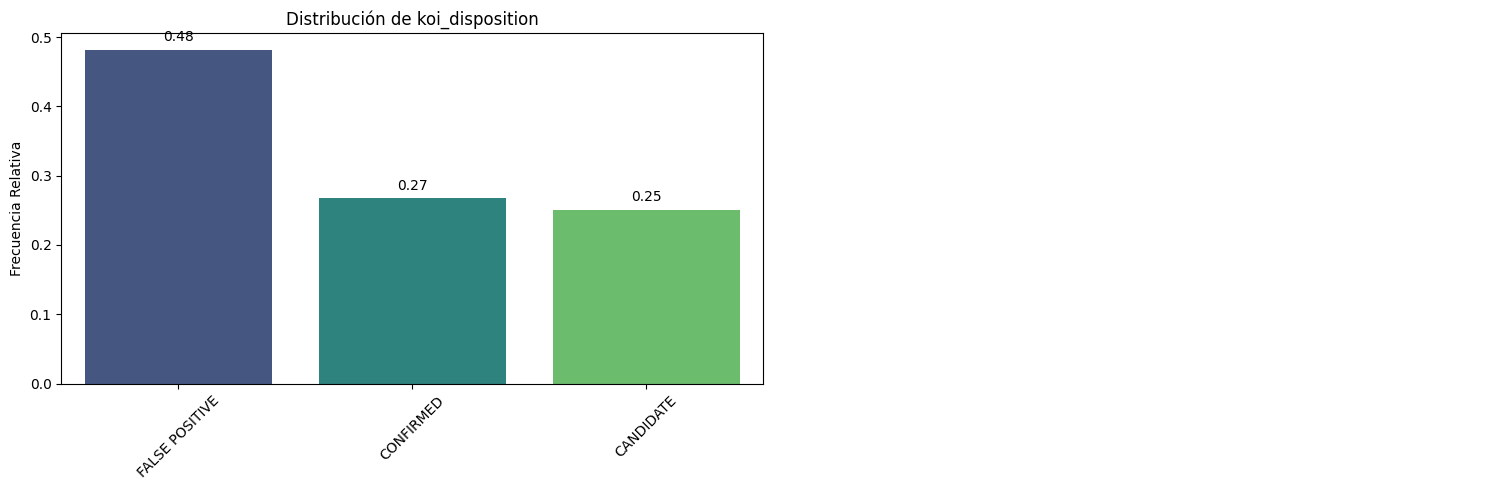

In [31]:
bt.pinta_distribucion_categoricas(df,[target], relativa = True, mostrar_valores= True)

La target esta desbalanceada. Lo tendremos en cuenta en el split y en los modelos.

**5. Dividimos entre train y test**

In [33]:
y = df[target]
X = df.drop(columns=target)

In [34]:
train_set, test_set = train_test_split(df, test_size= 0.2, stratify=y, random_state= 42)

In [35]:
train_set[target].value_counts(True)

koi_disposition
FALSE POSITIVE    0.481916
CONFIRMED         0.267191
CANDIDATE         0.250893
Name: proportion, dtype: float64

In [36]:
len(train_set.columns)

37

**6. Mini-EDA**

Seleccionamos las variables que no son significativas, utilizando la funcion del toolbox que utiliza la signficancia estadistica.

In [41]:
col_in = tlb.get_features_num_classification(train_set, target_col="koi_disposition")
len(col_in)

30

In [42]:

col_out = [val for val in train_set.columns if val not in col_in]
col_out.remove(target)
col_out

['koi_impact_err2',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2']

Eliminamos las variables seleccionadas del train y del test

In [43]:
train_set = train_set.drop(columns=col_out)
test_set = test_set.drop(columns=col_out)

Hacemos un analisis visual de la relacion de las variables con la target y entre ellas.

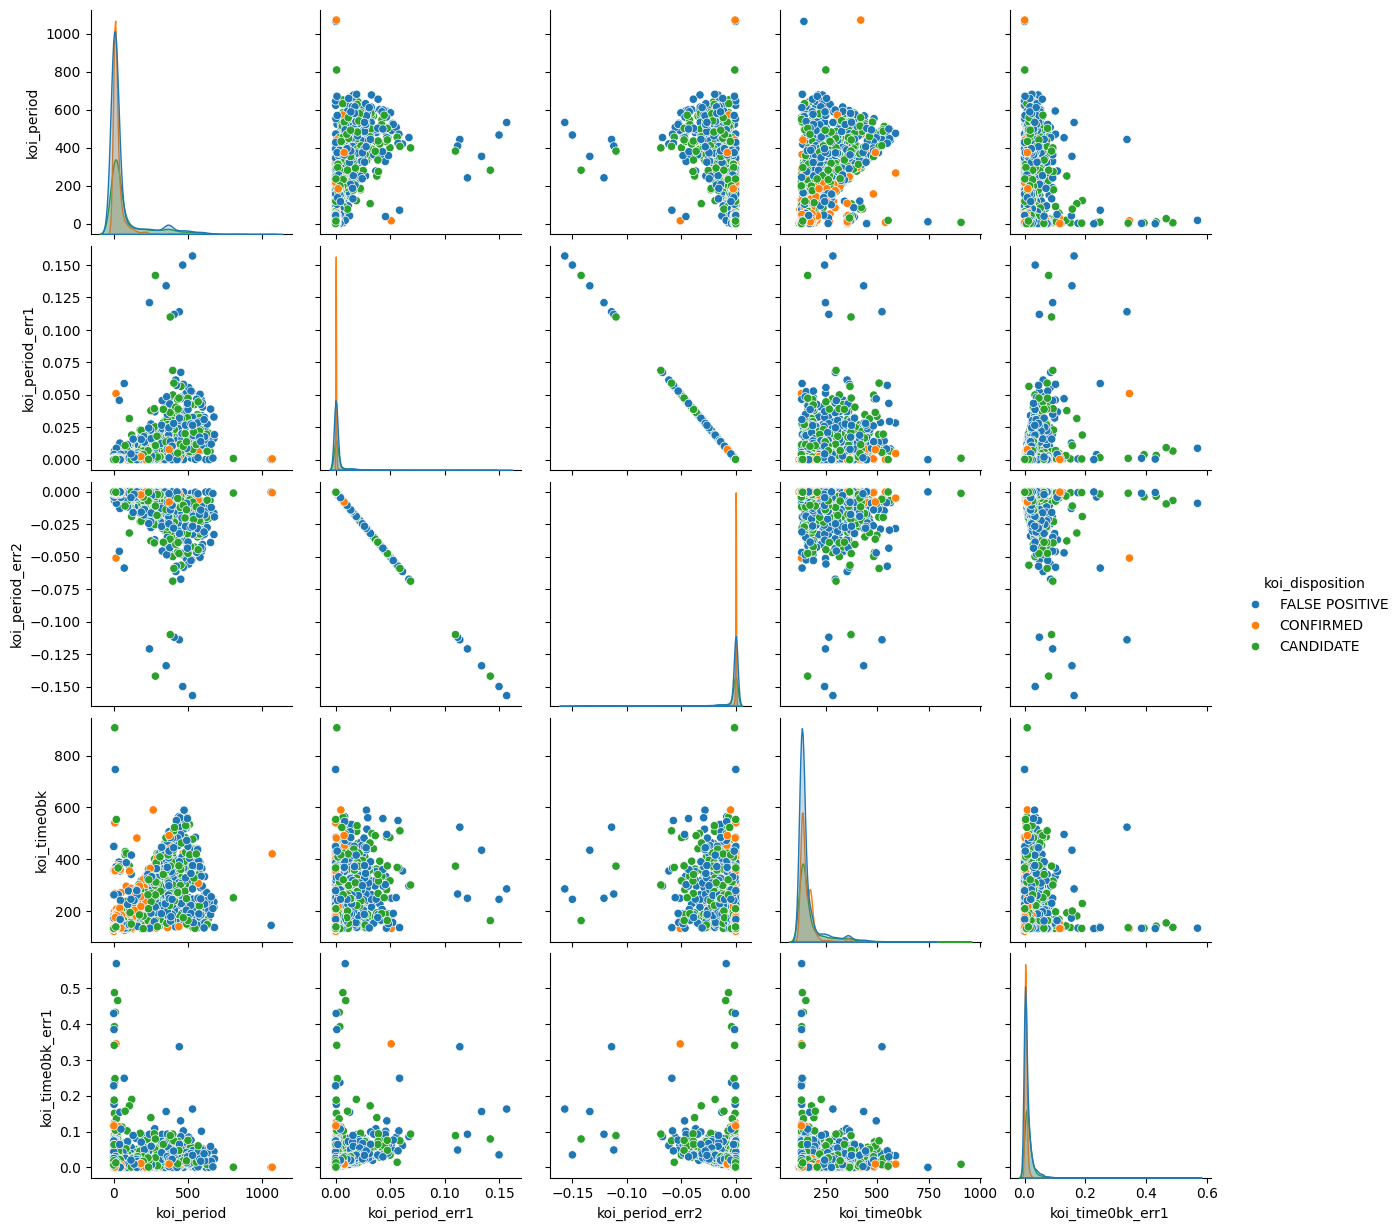

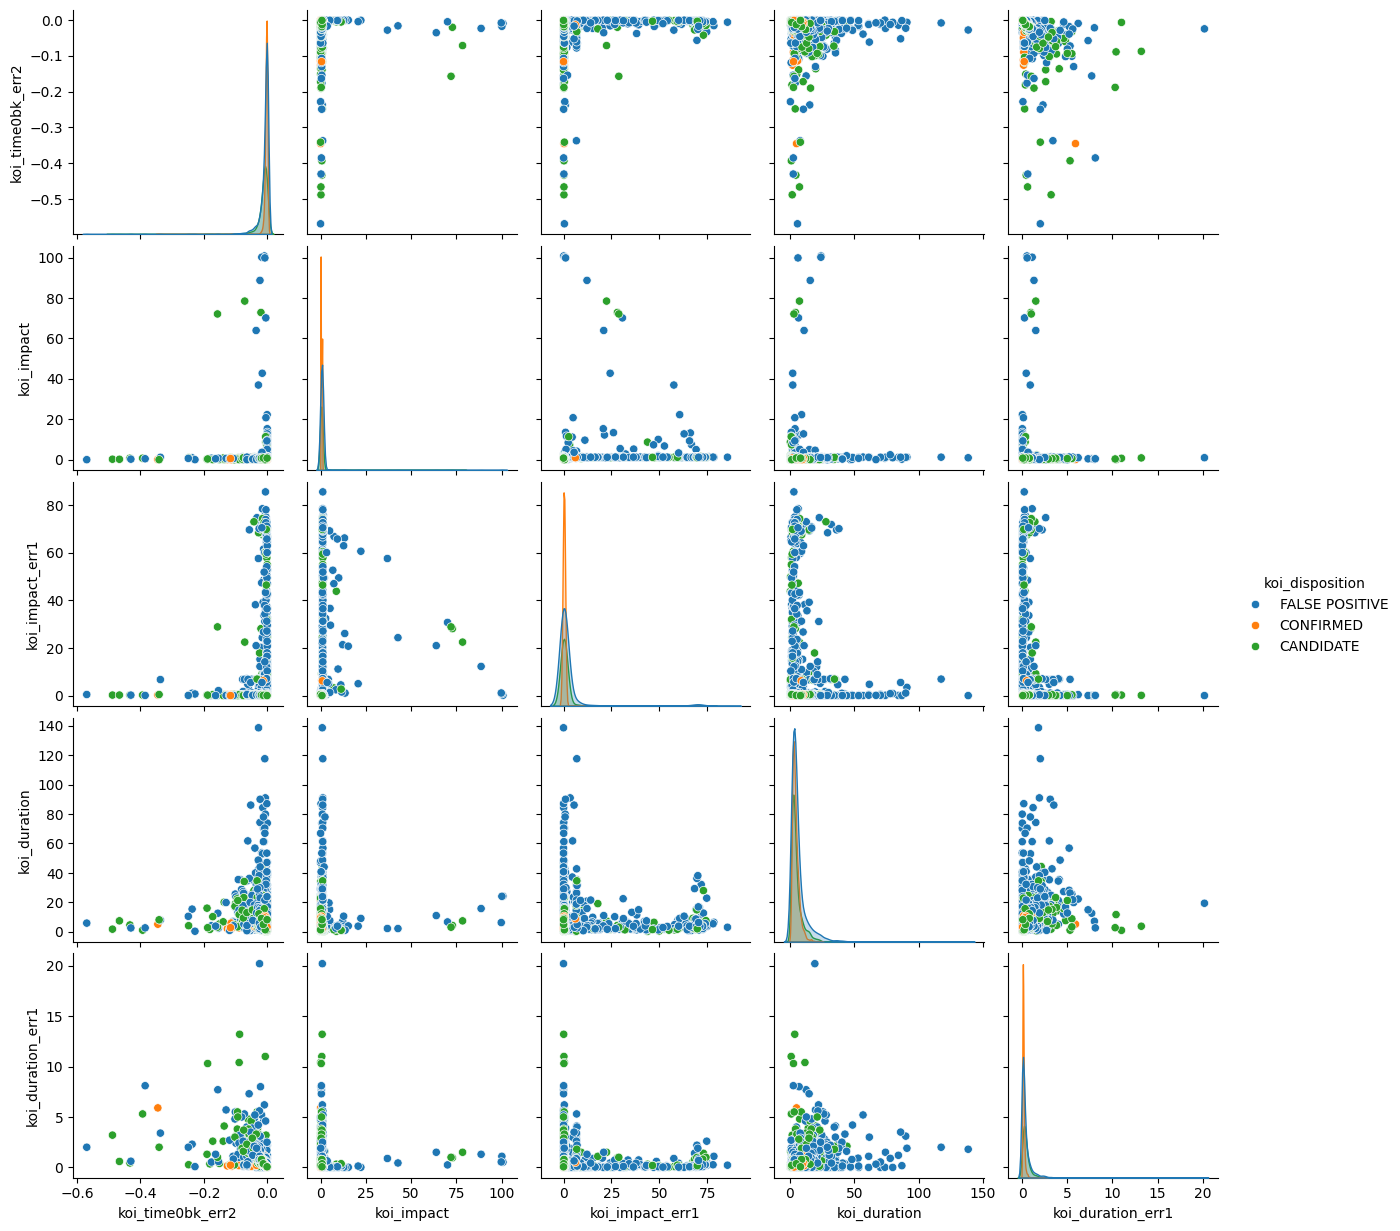

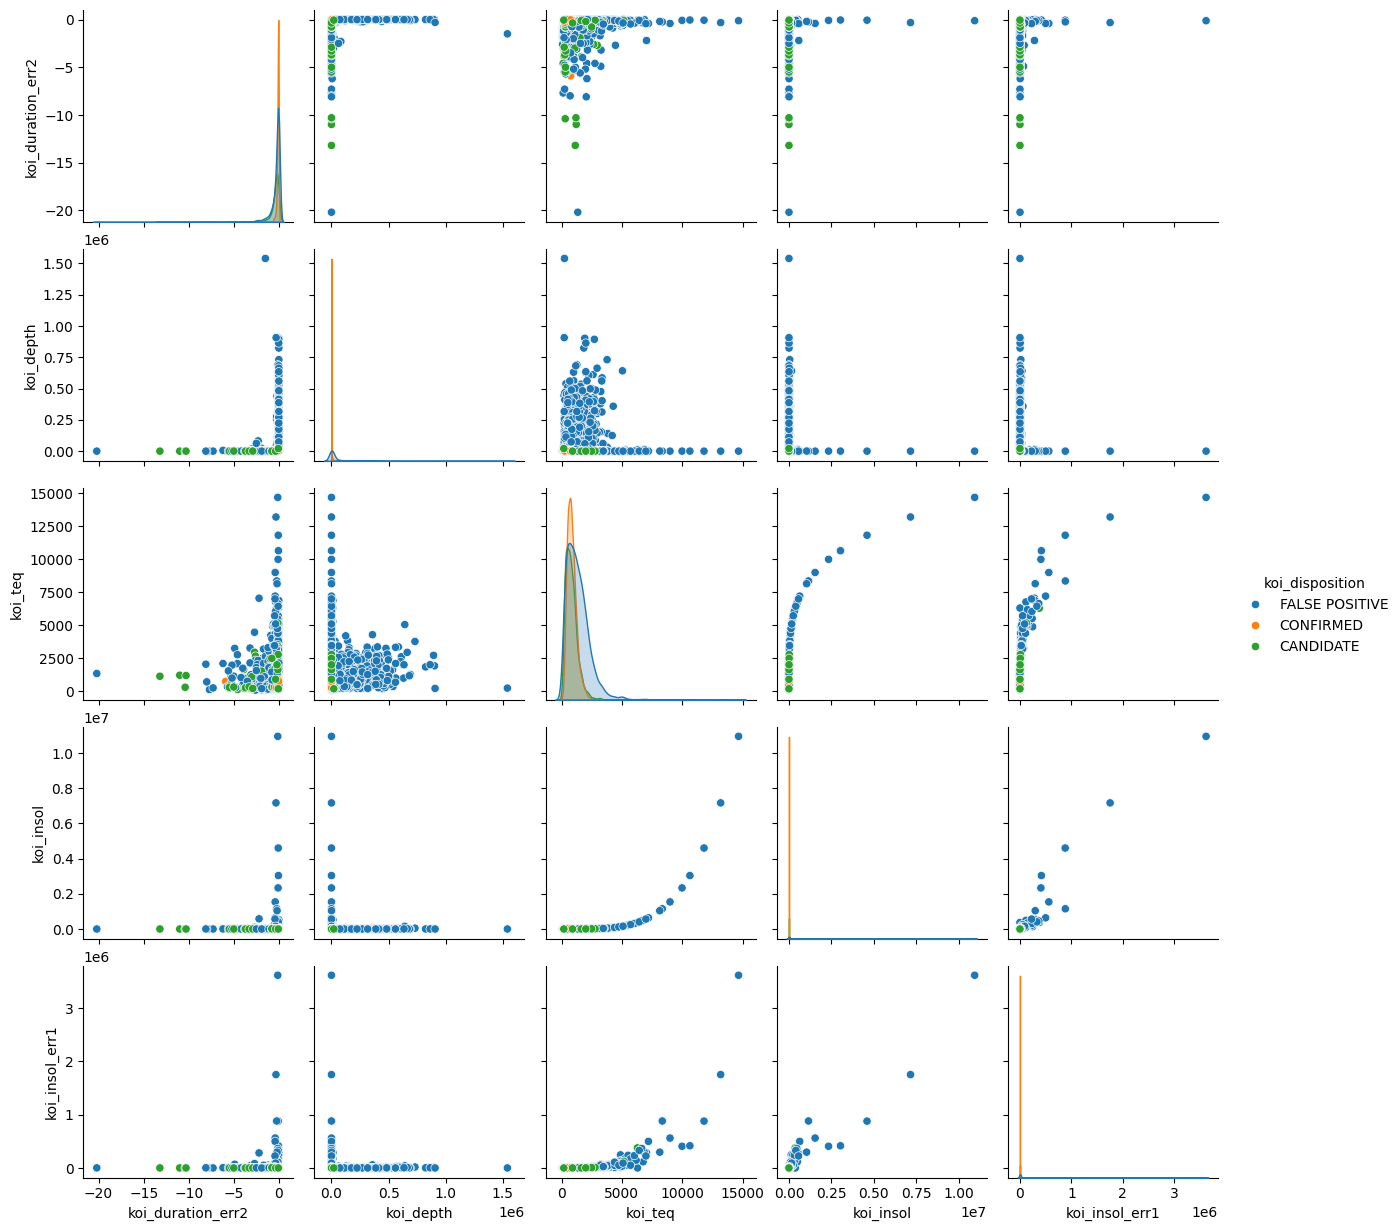

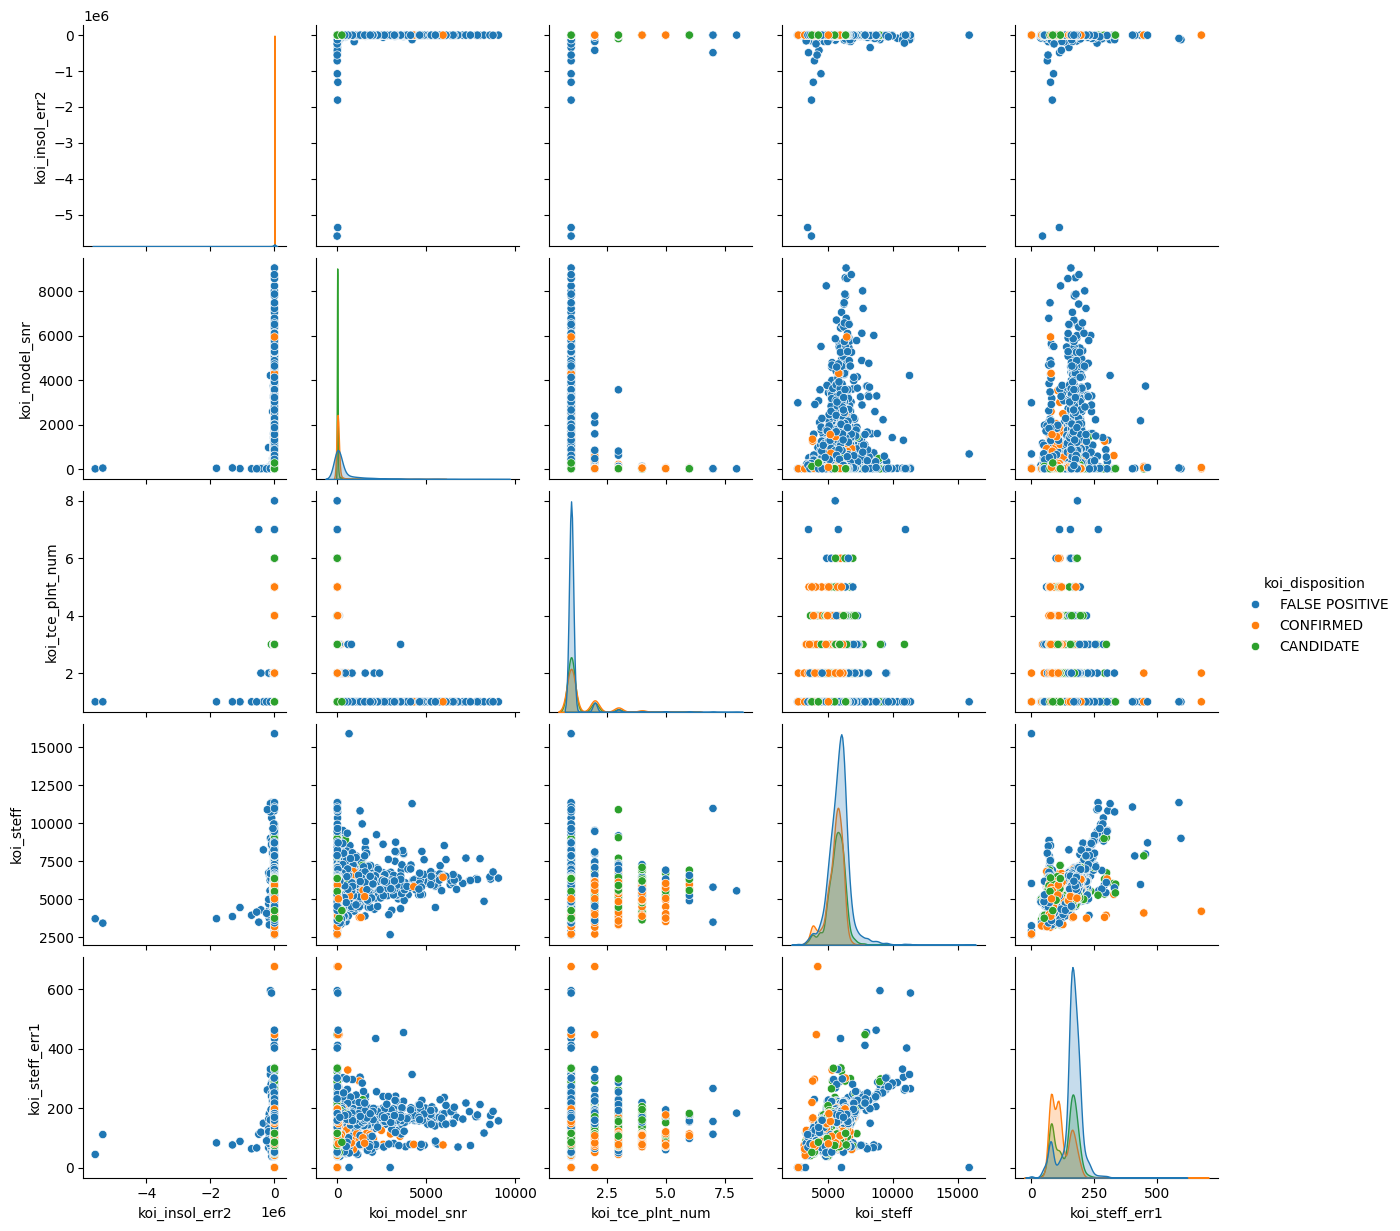

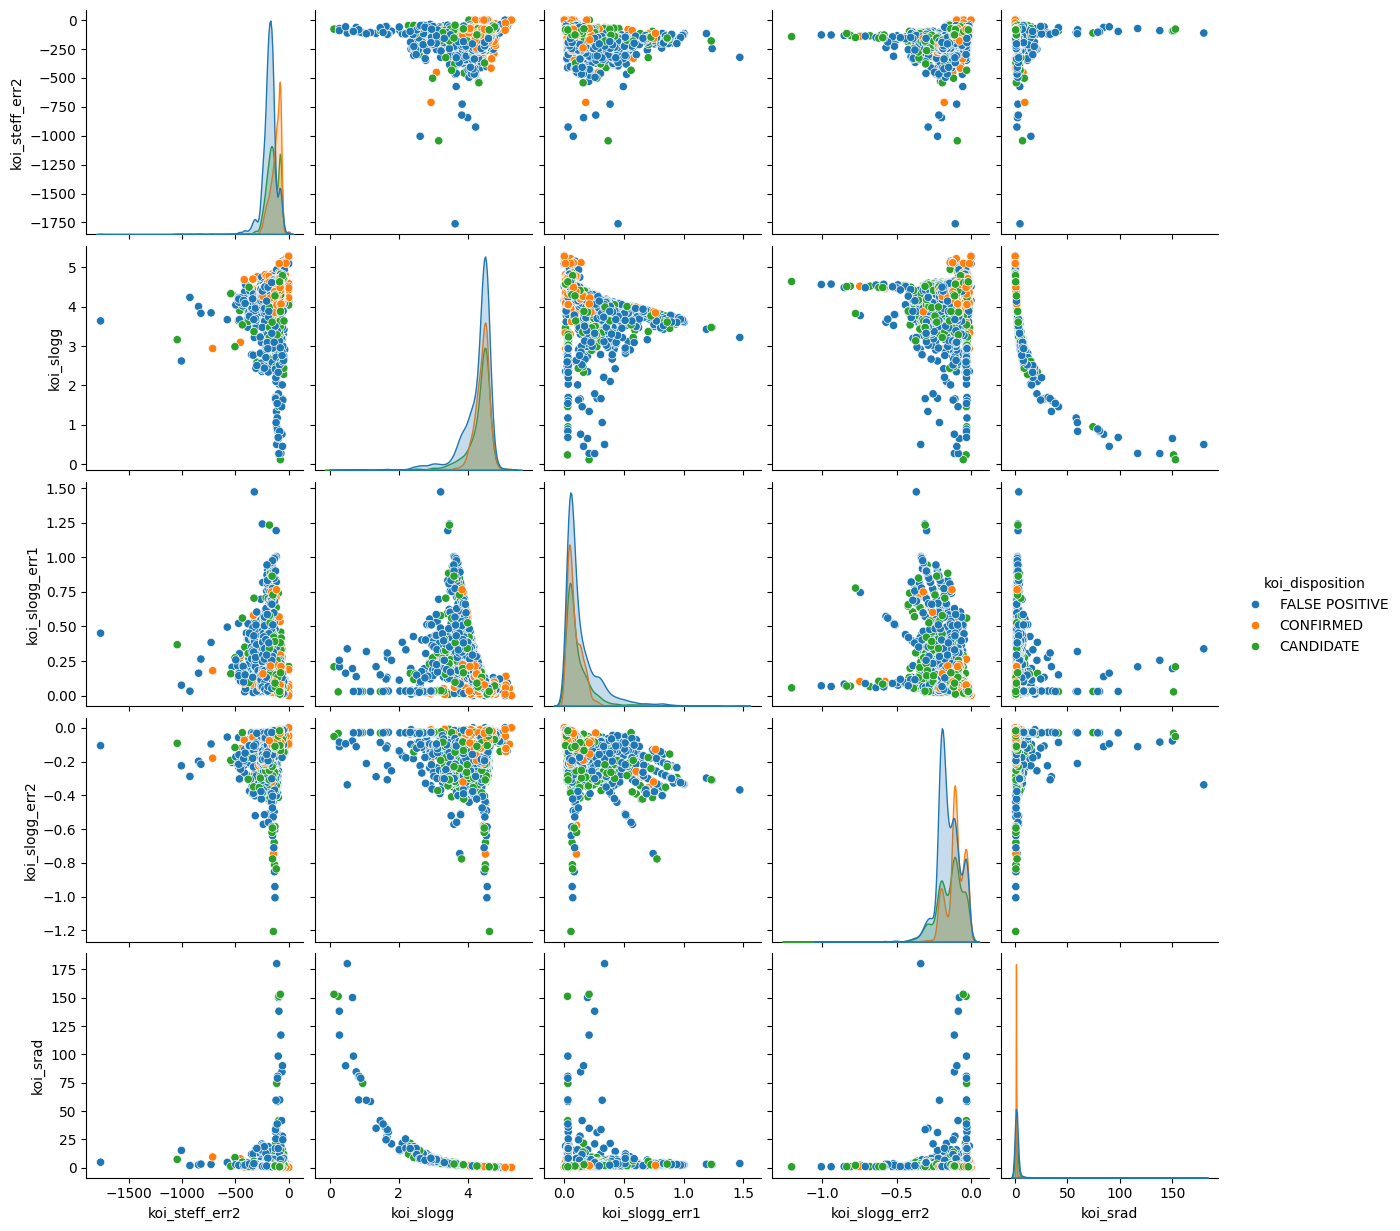

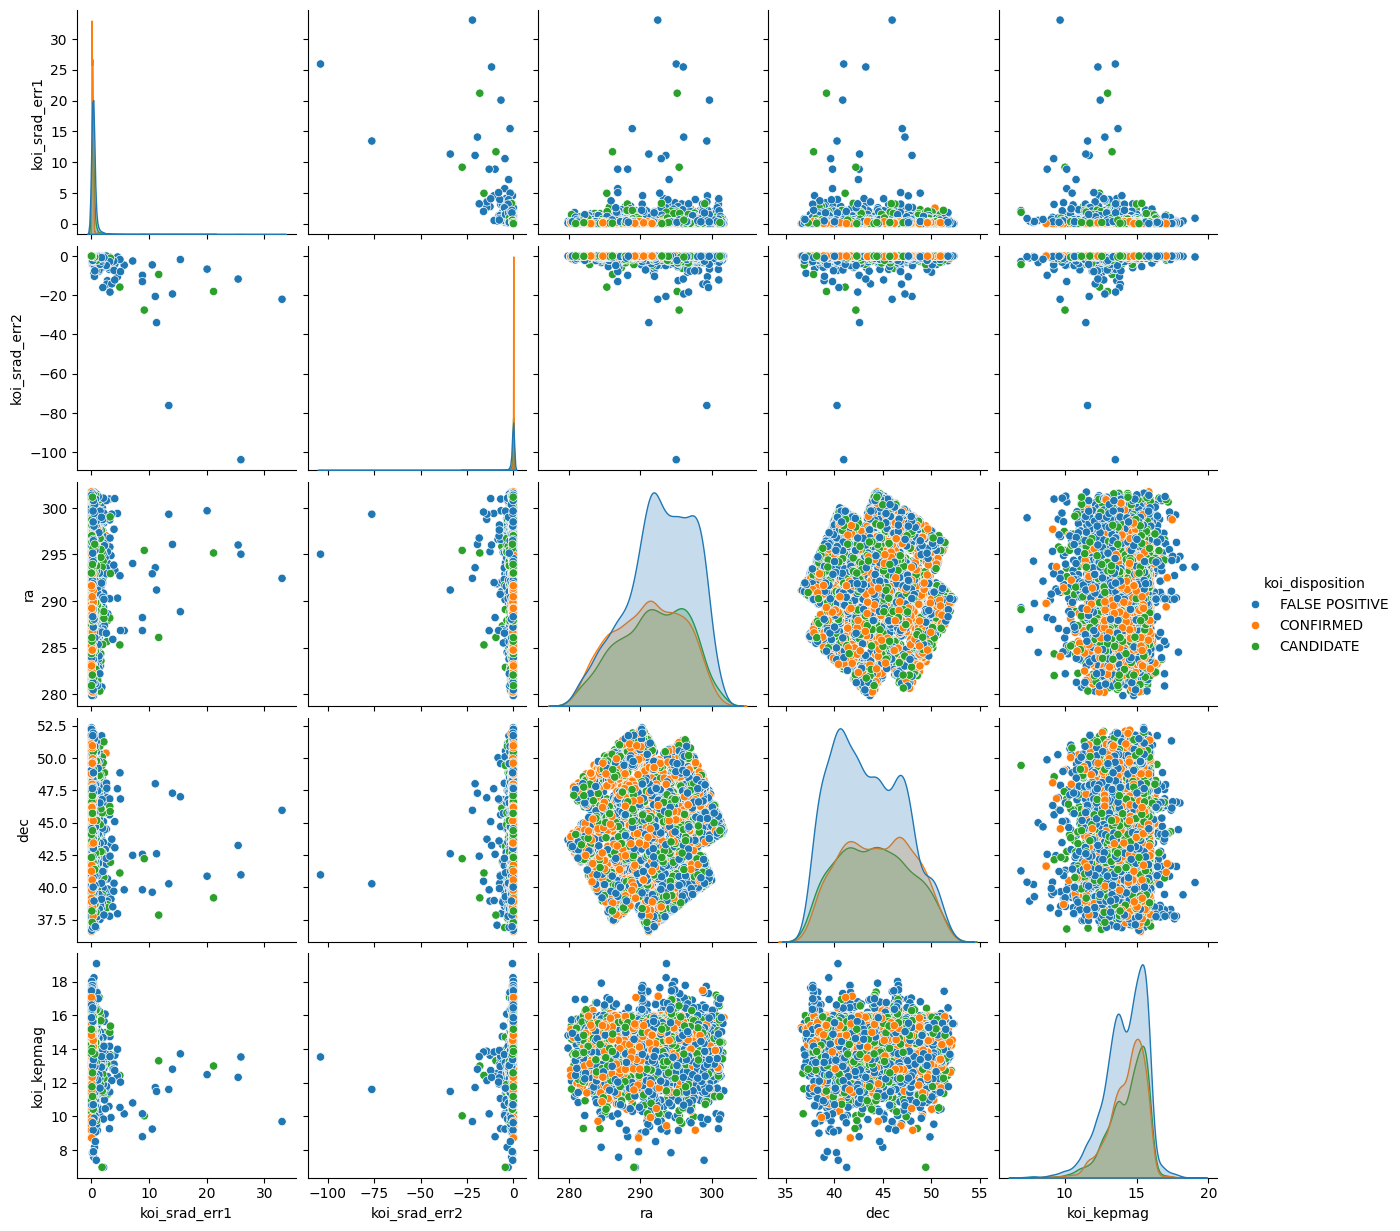

['koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

In [44]:
tlb.plot_features_num_classification(train_set, target_col=target)

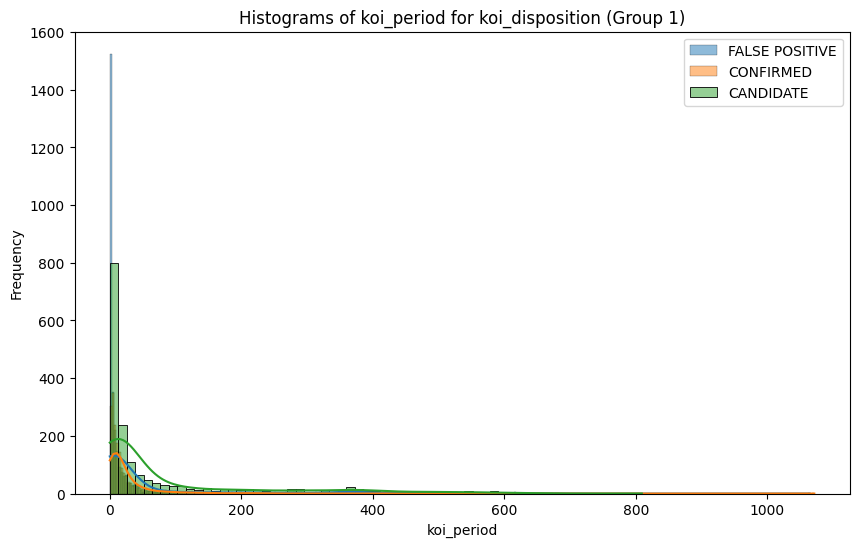

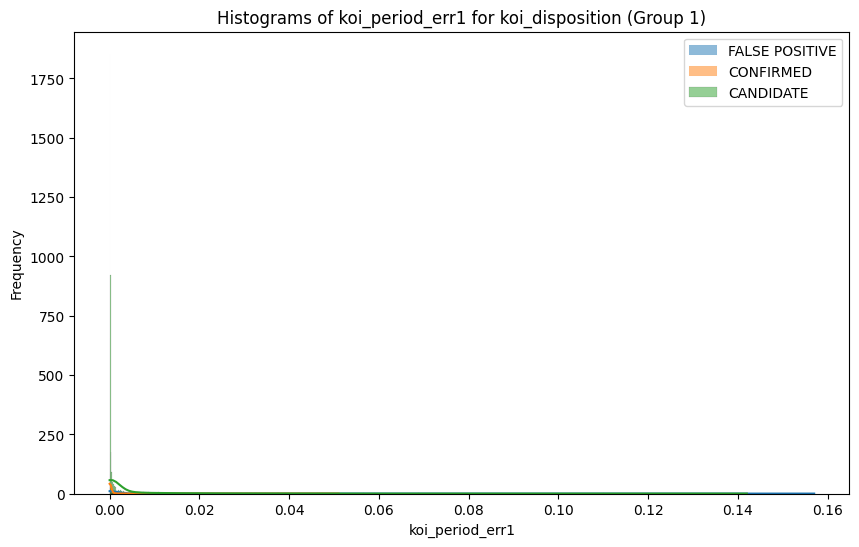

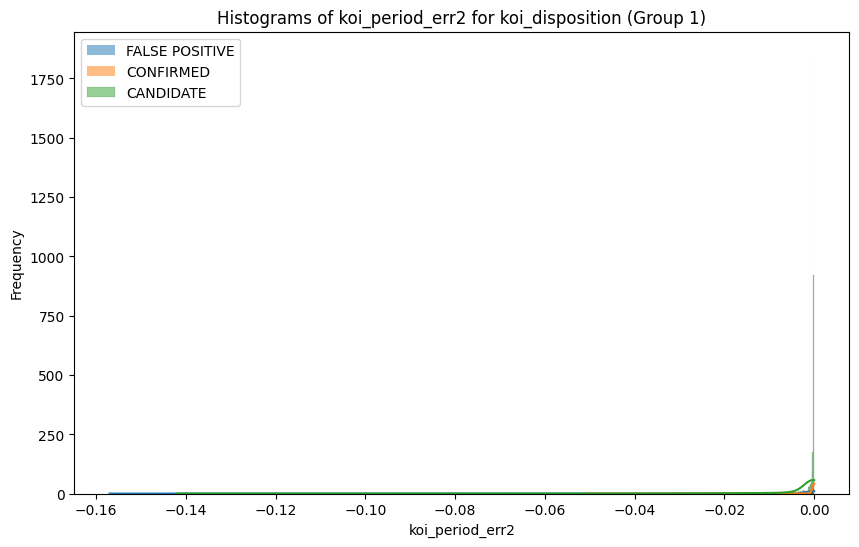

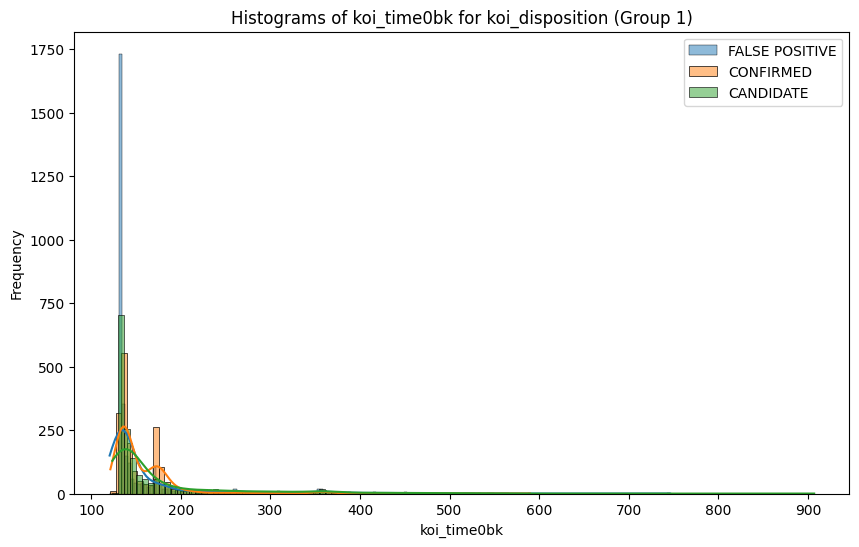

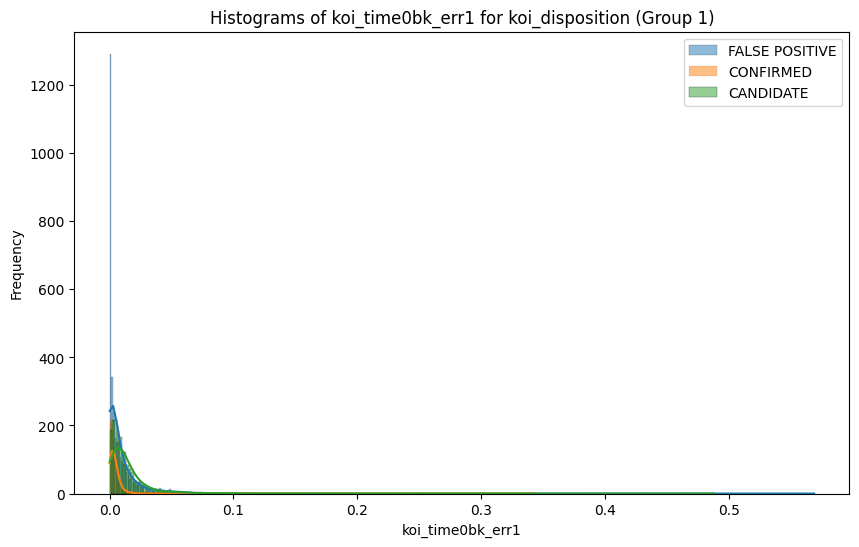

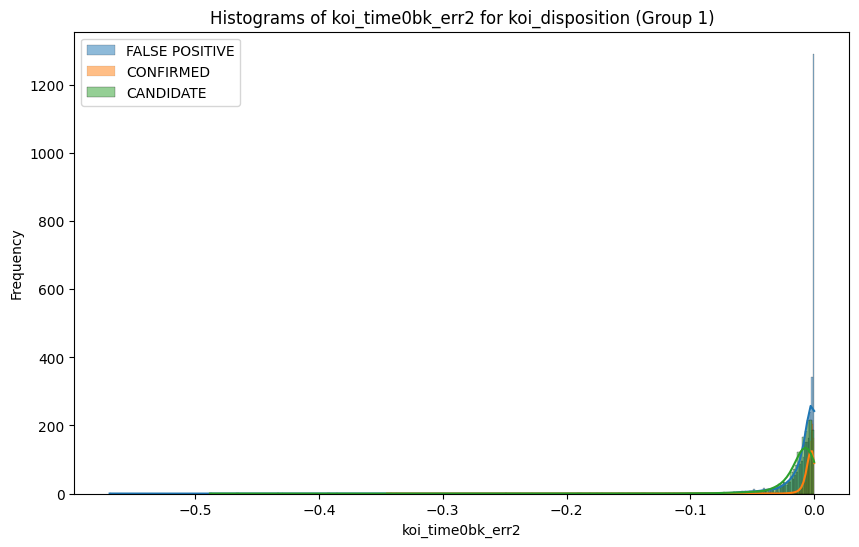

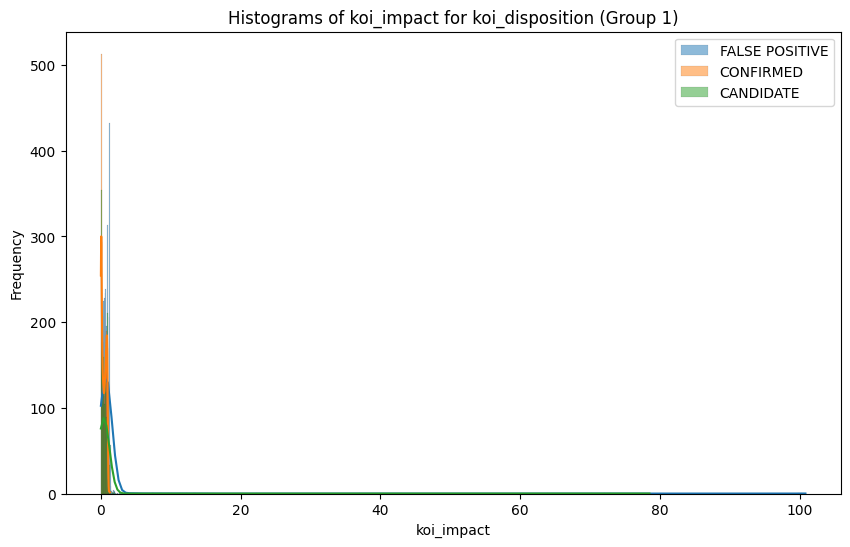

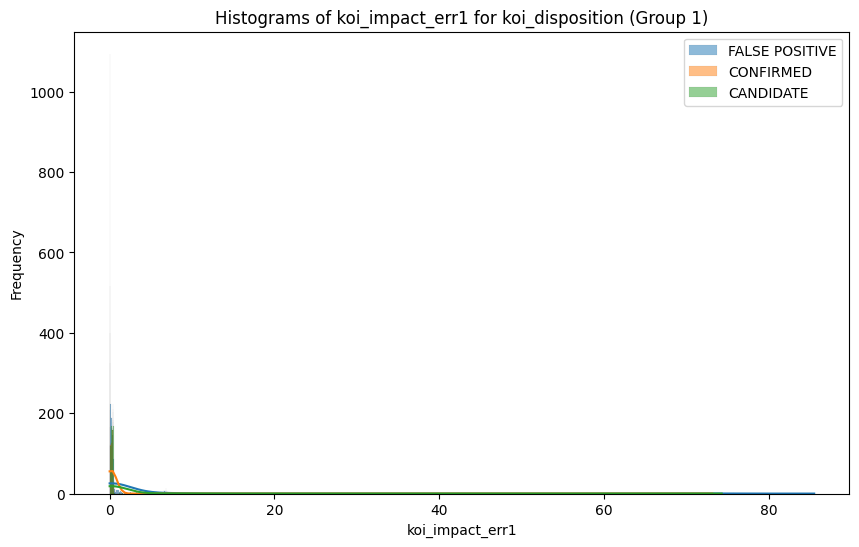

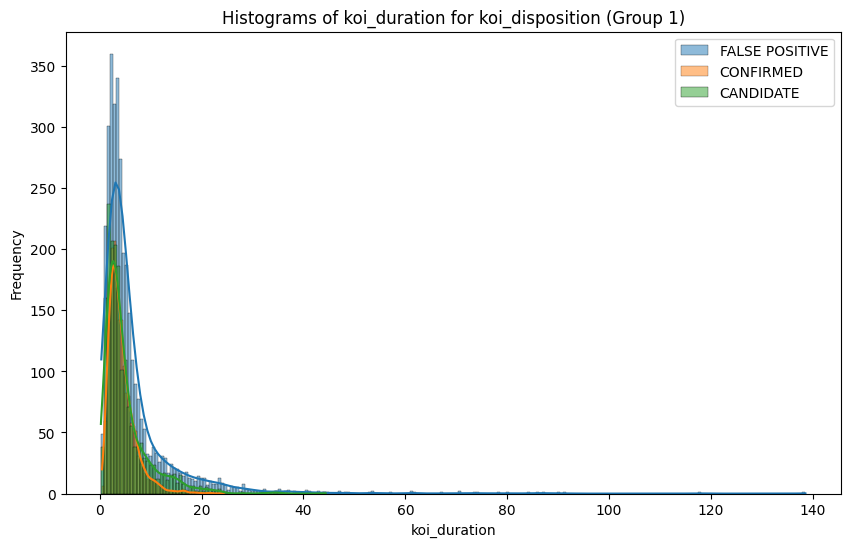

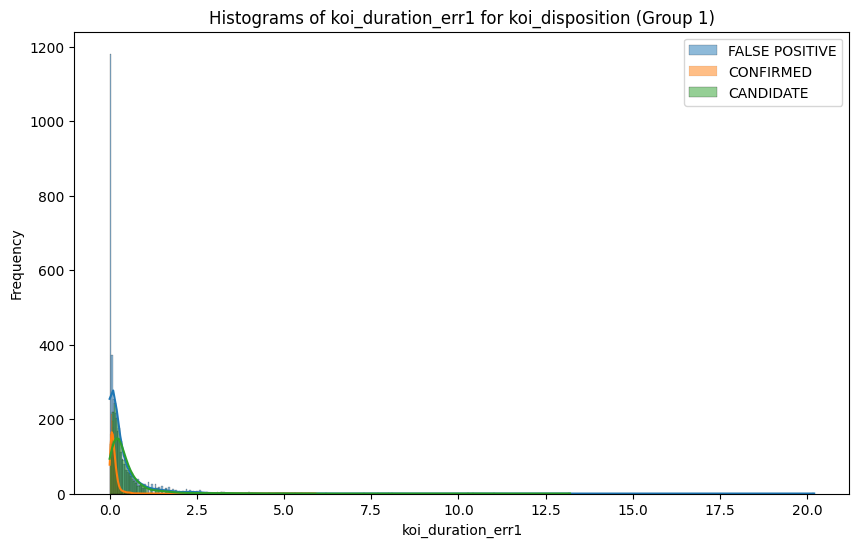

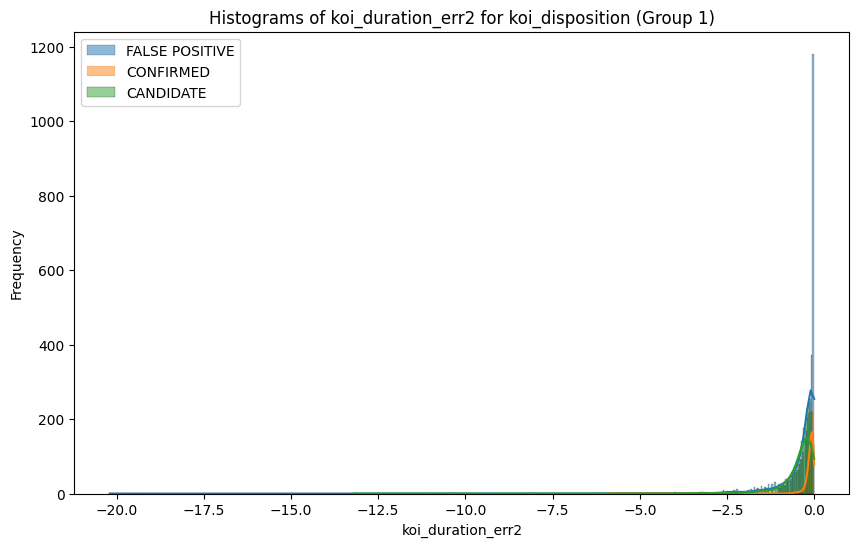

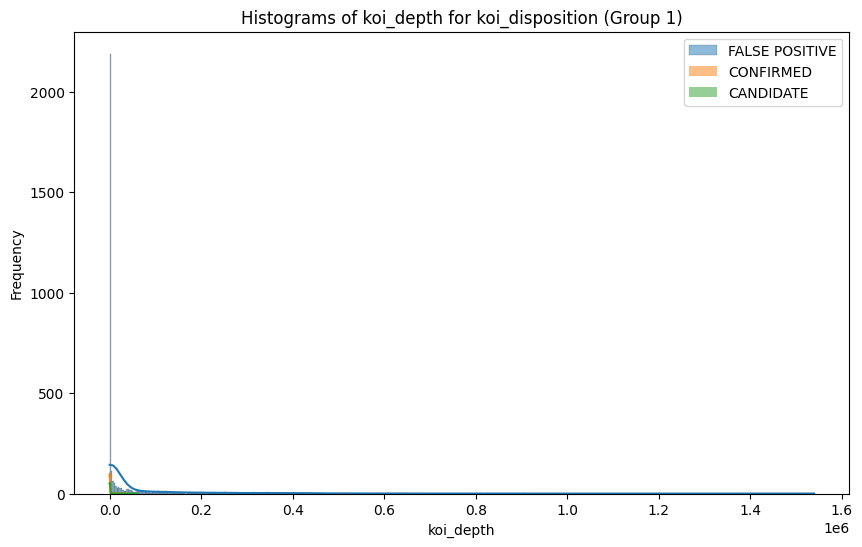

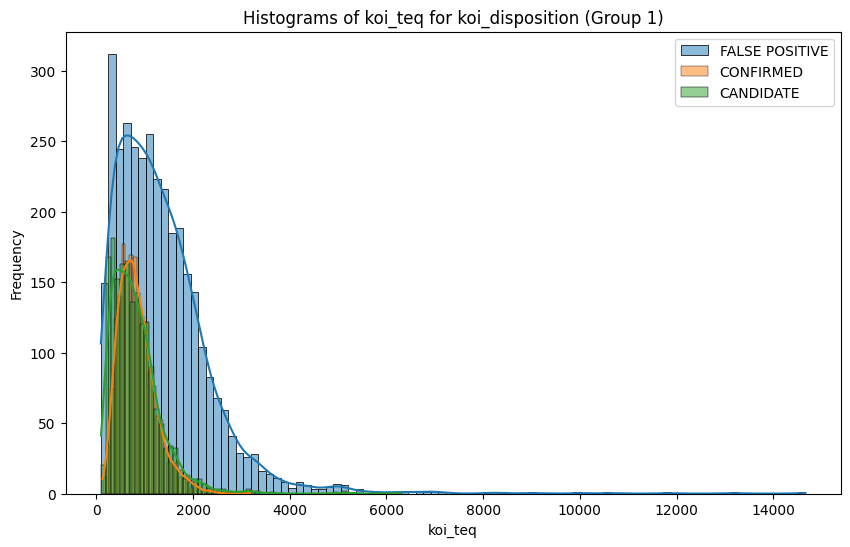

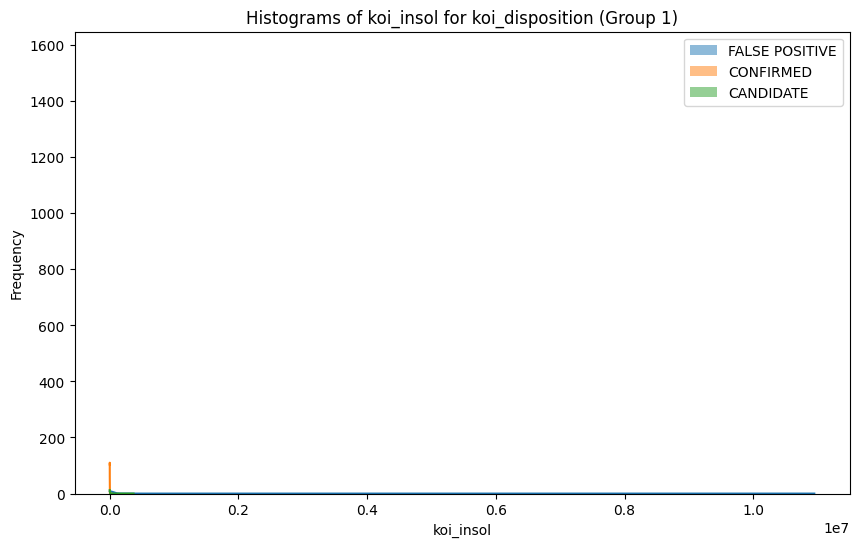

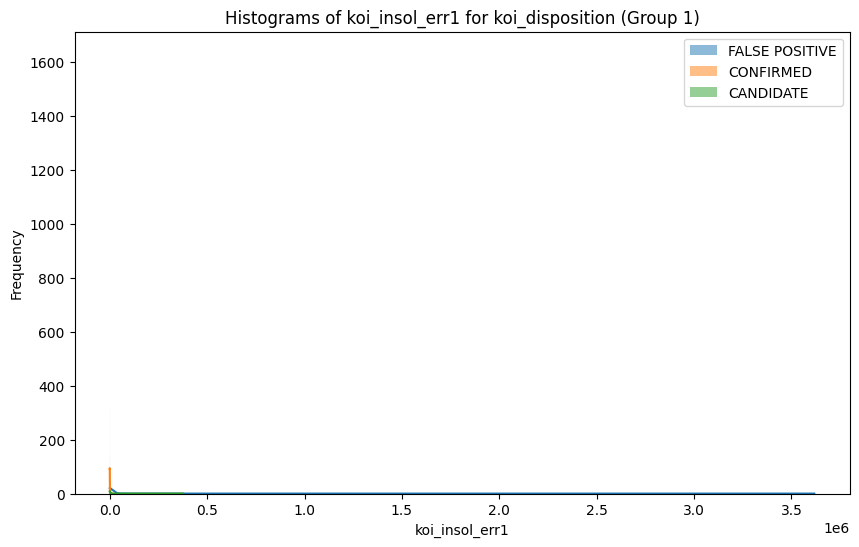

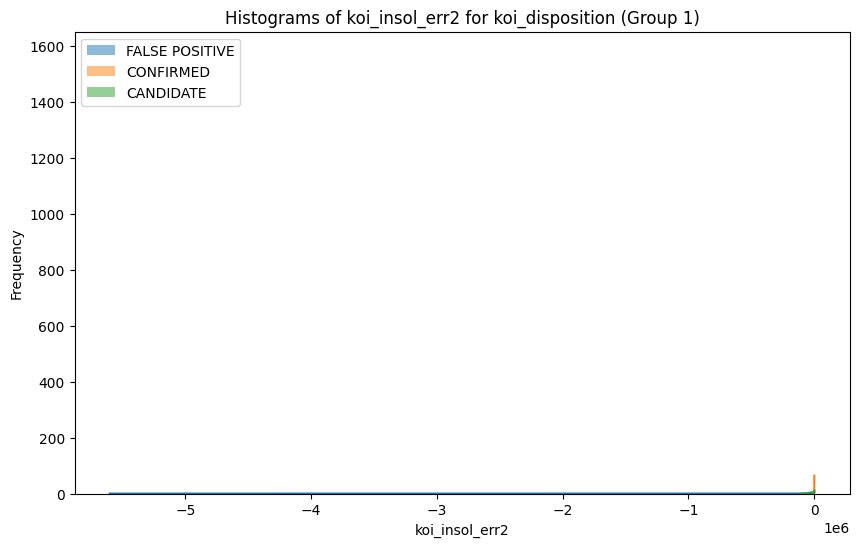

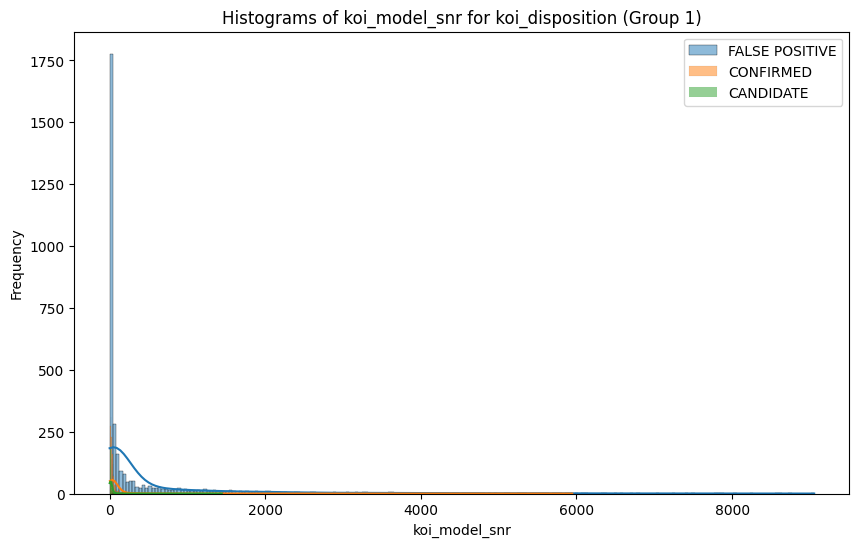

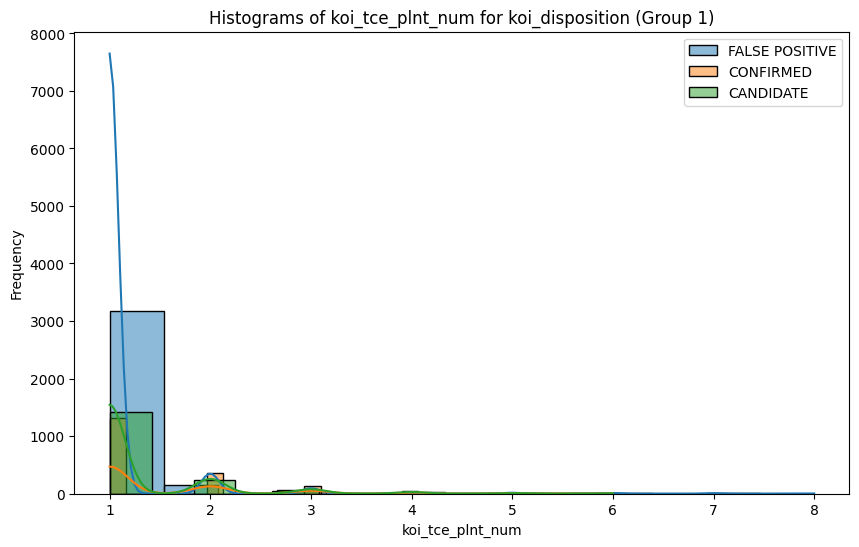

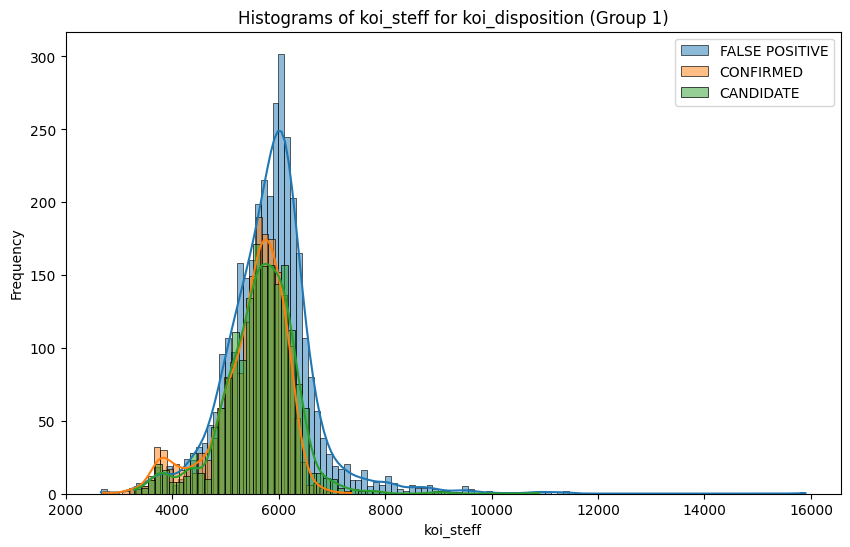

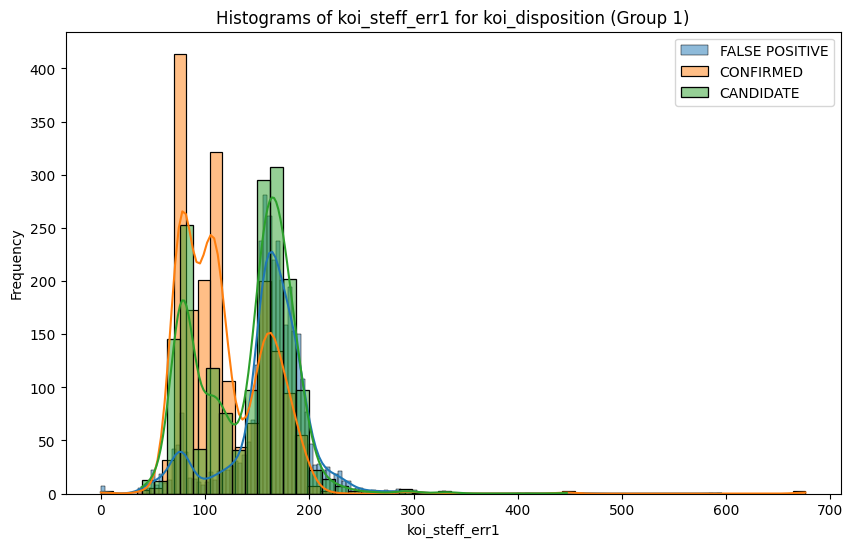

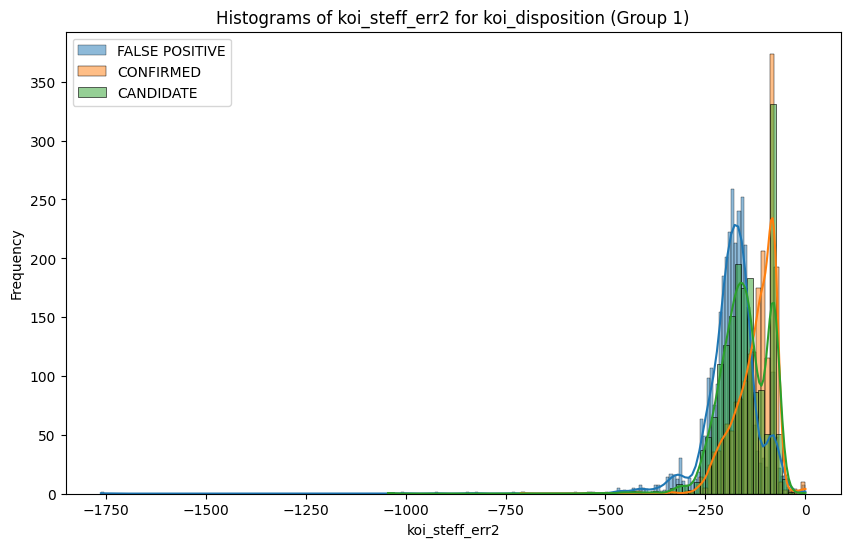

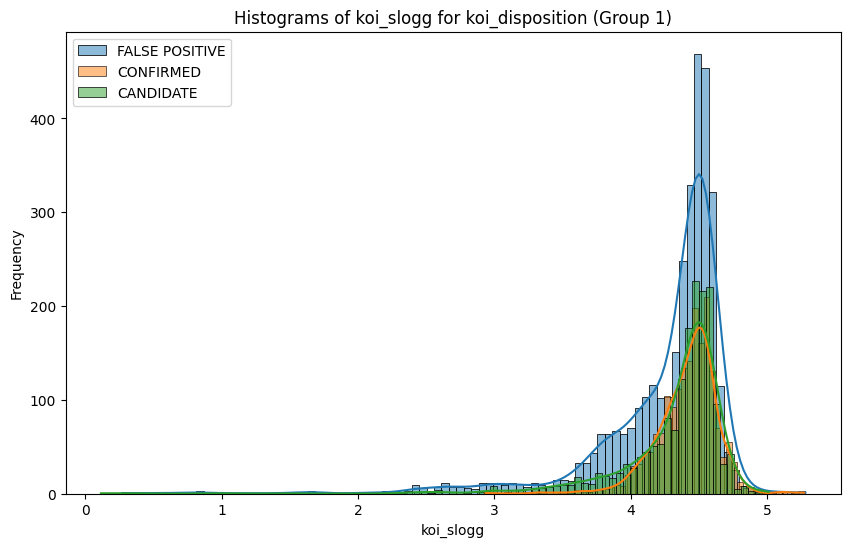

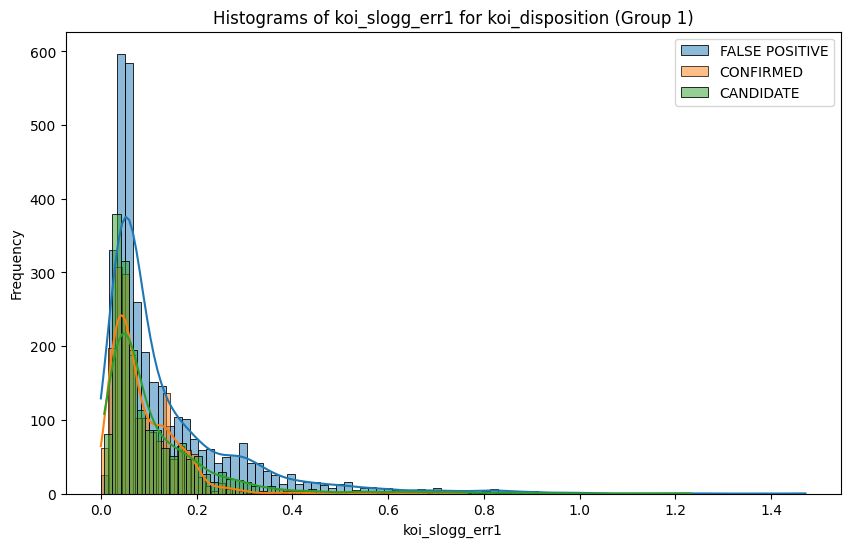

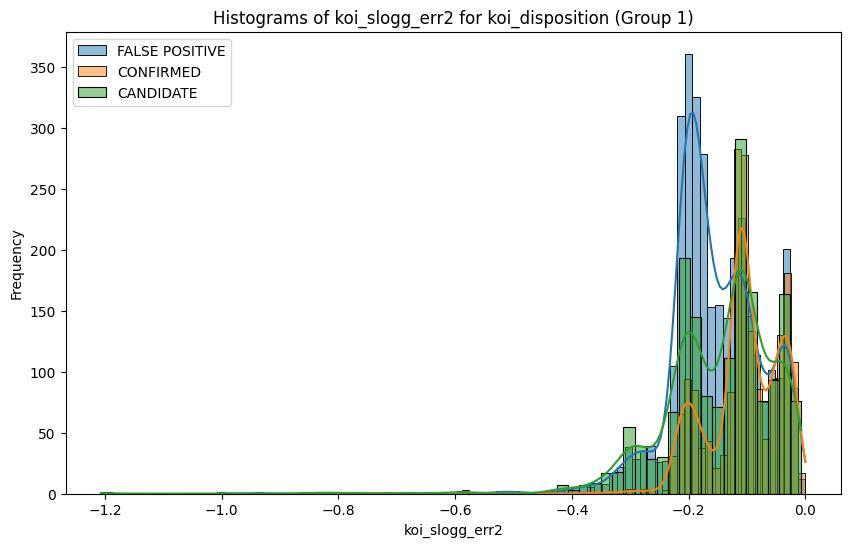

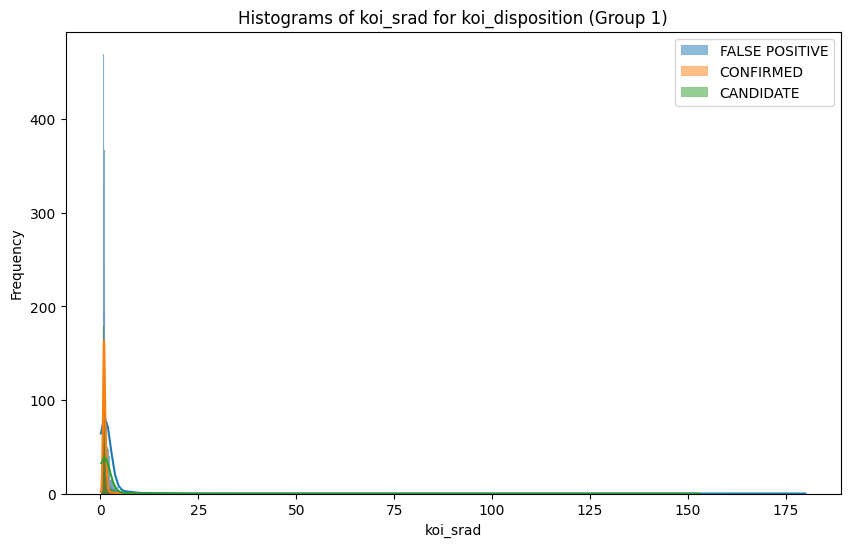

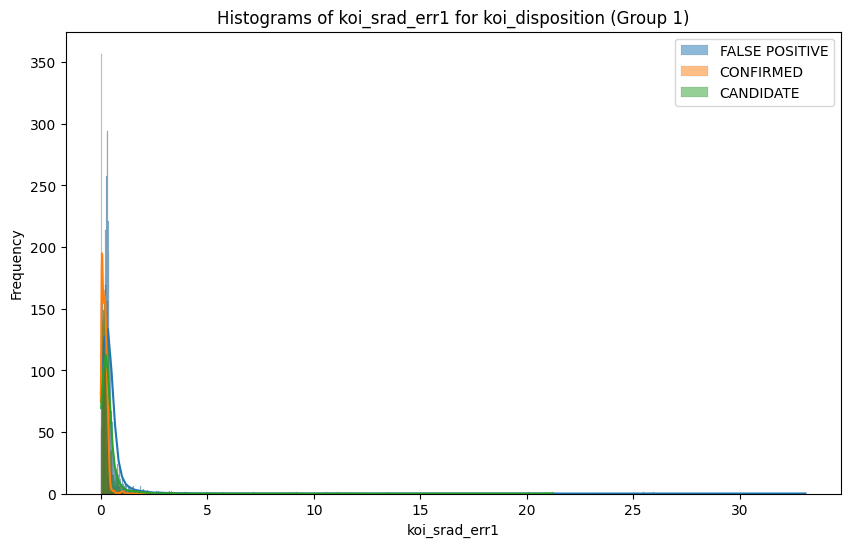

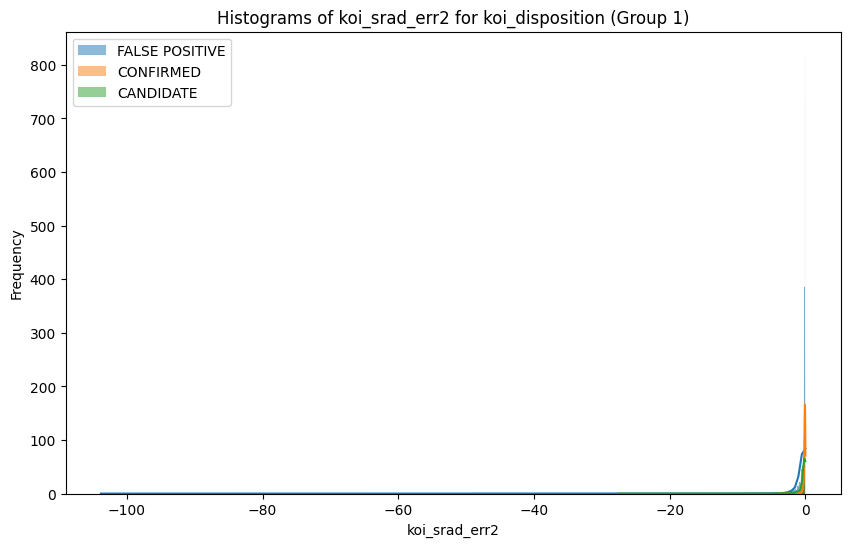

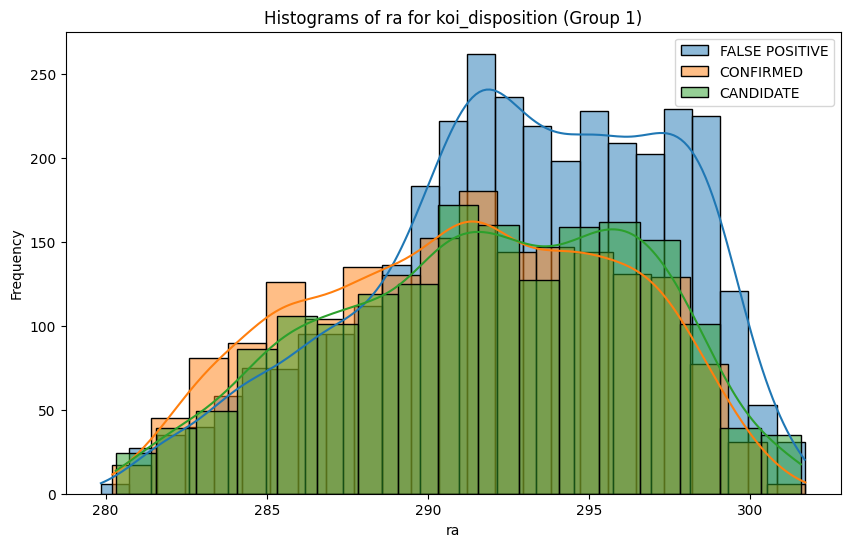

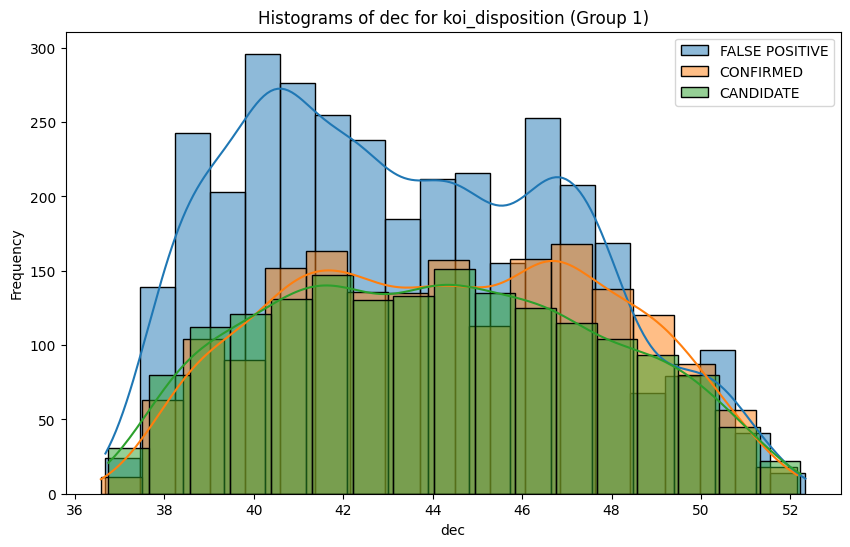

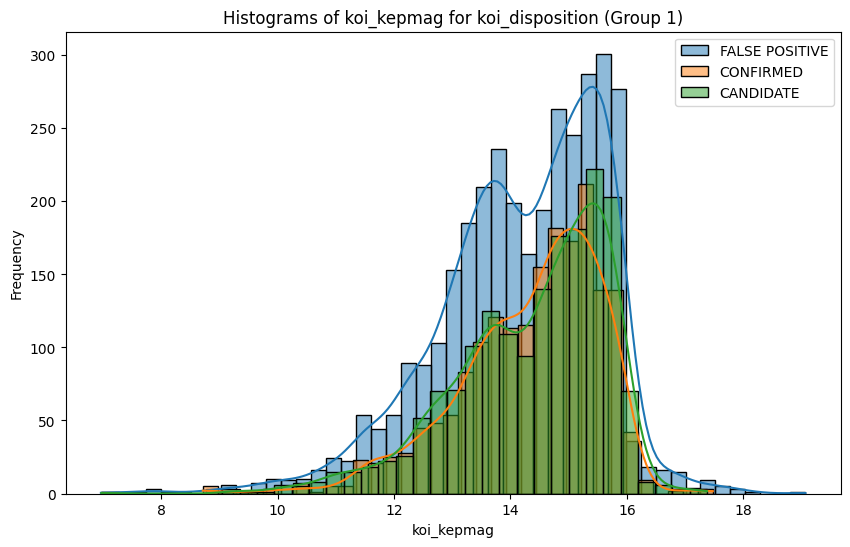

In [45]:
for col in col_in:
    bt.plot_grouped_histograms(train_set, target, col, 3)
    

De momento quedo con la seleccion que resulta del test de significancia estadistica.

**6. Preparar datos**

In [46]:
features = [col for col in train_set.columns if col != target]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9656\2247739886.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


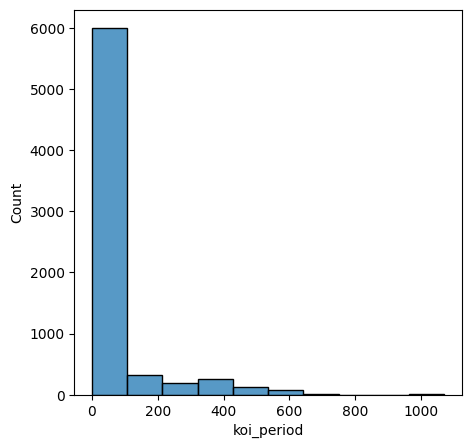

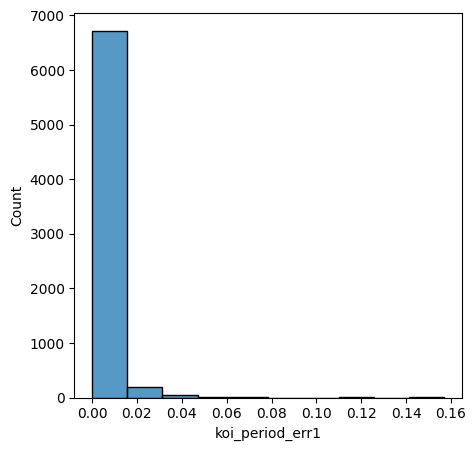

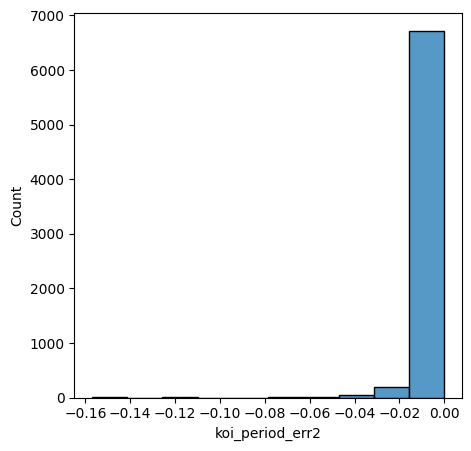

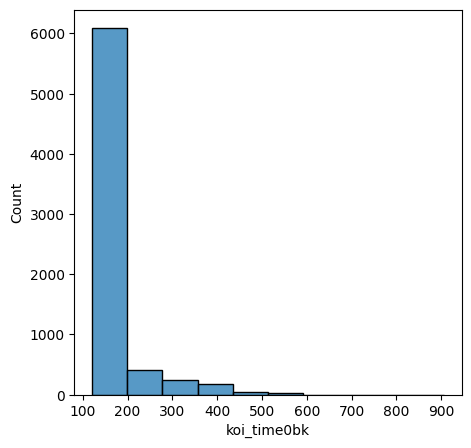

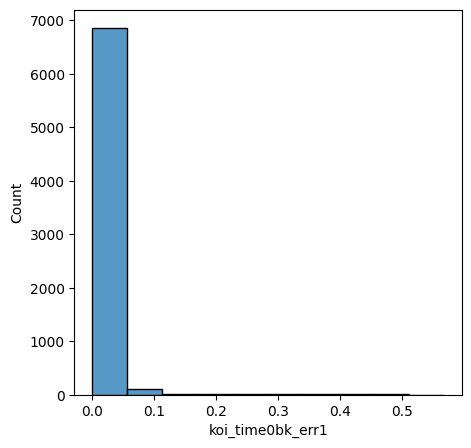

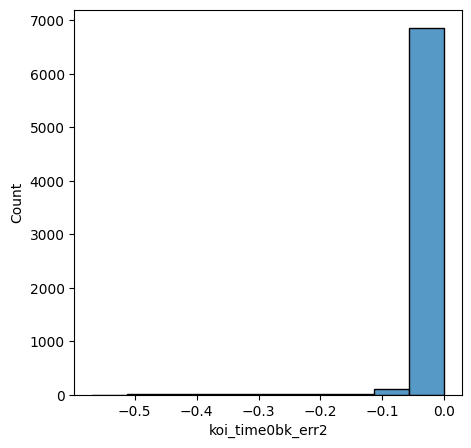

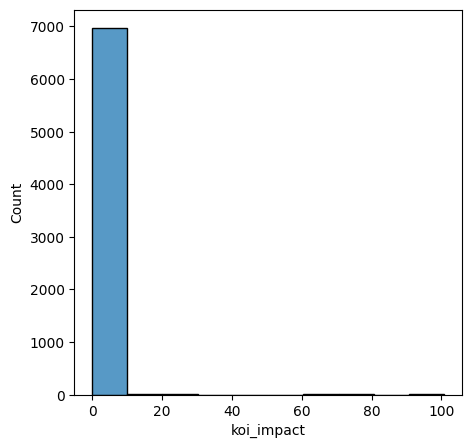

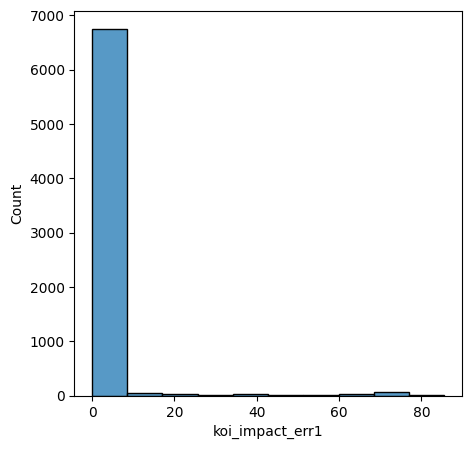

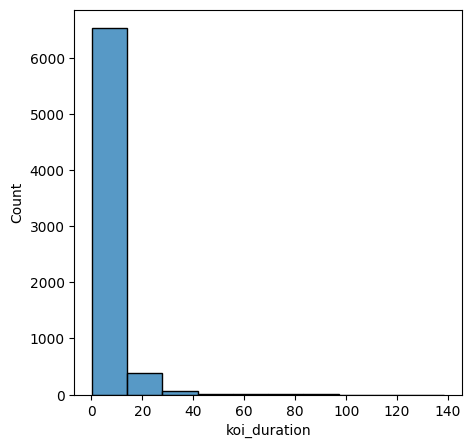

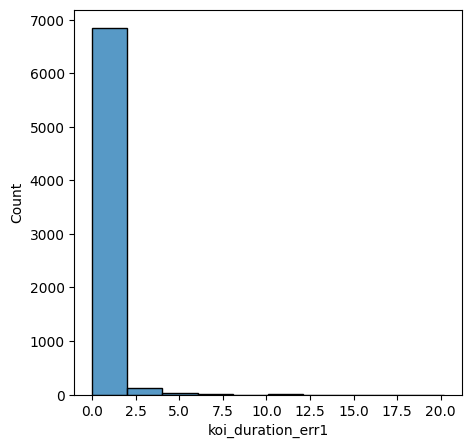

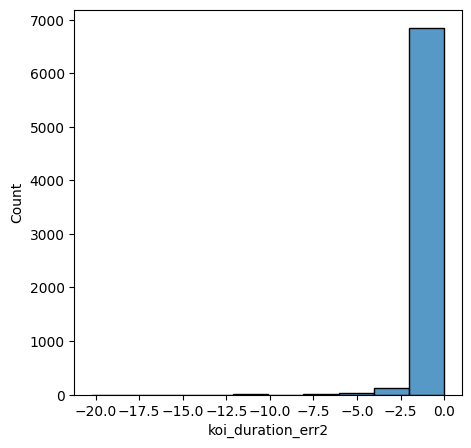

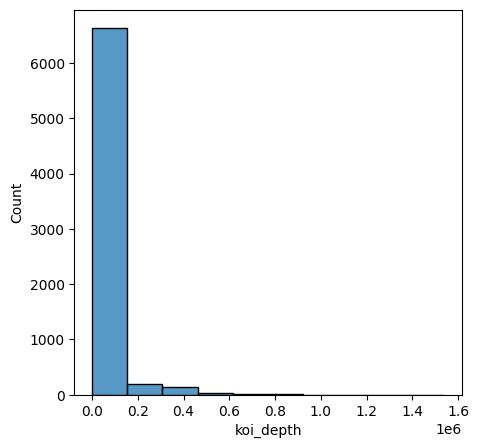

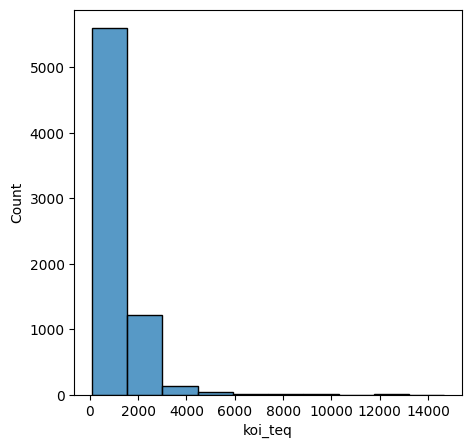

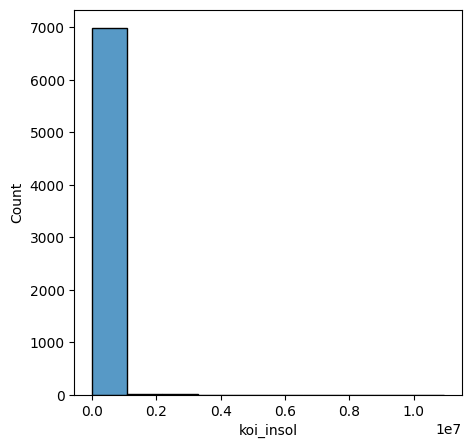

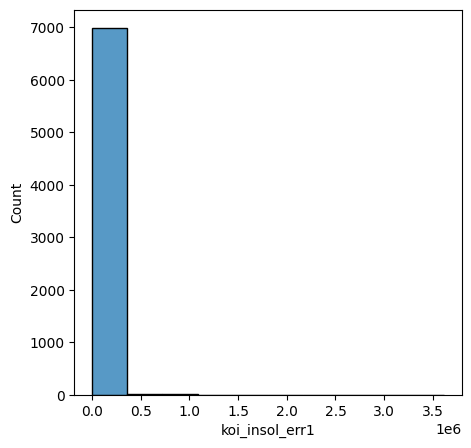

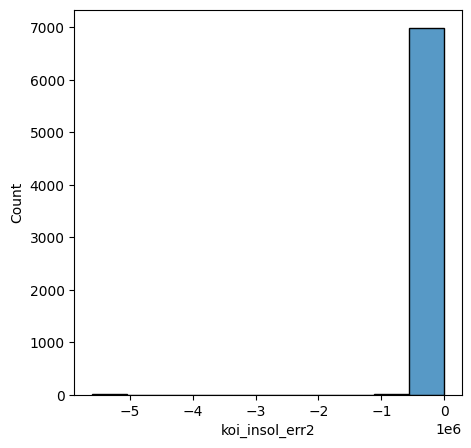

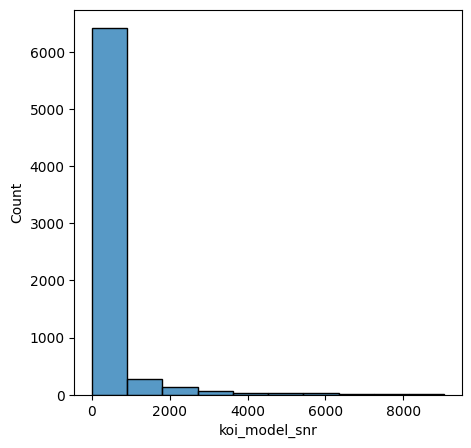

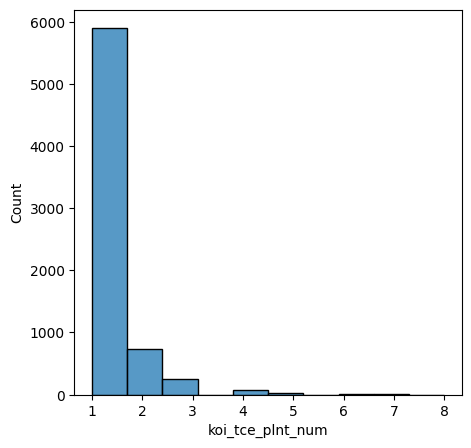

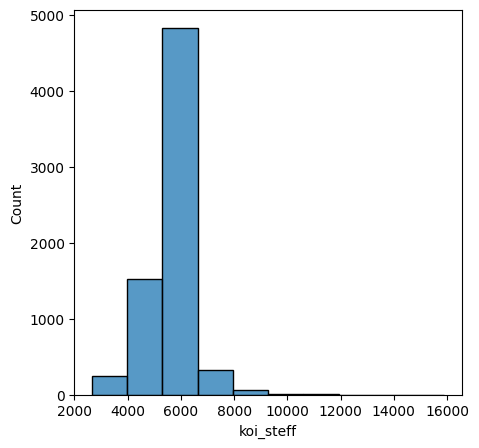

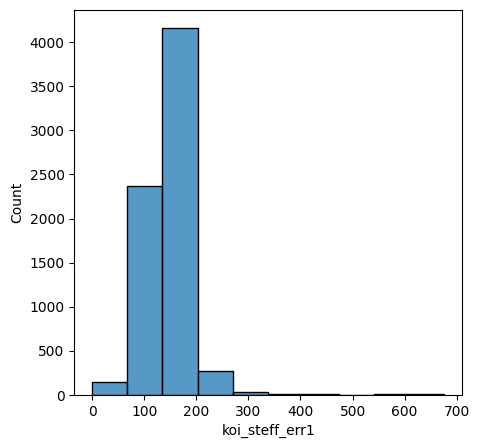

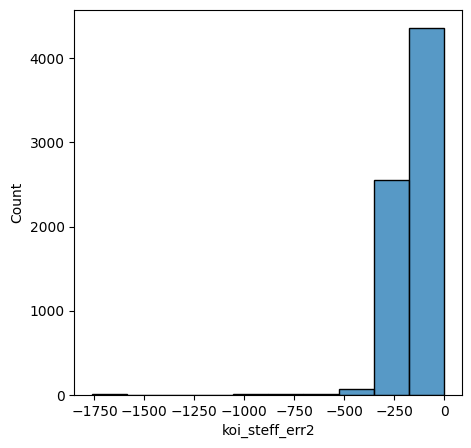

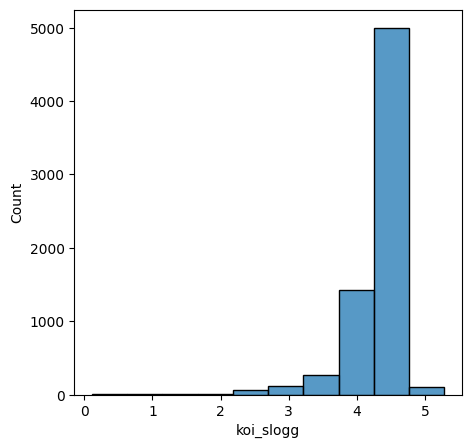

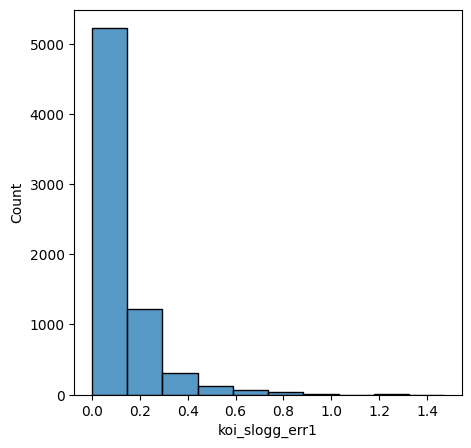

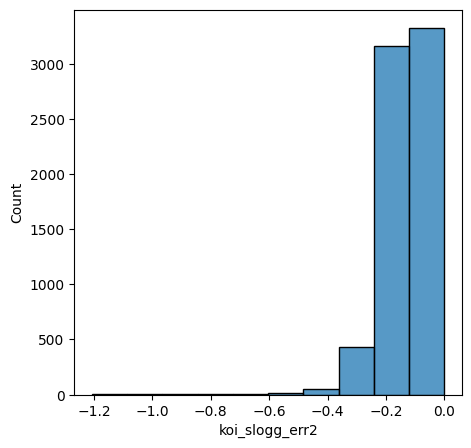

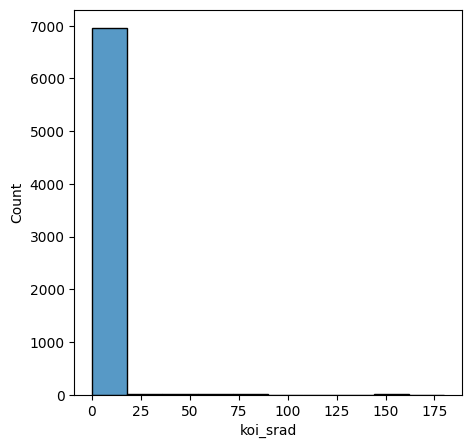

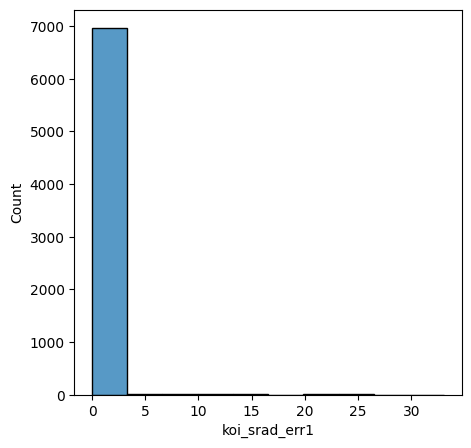

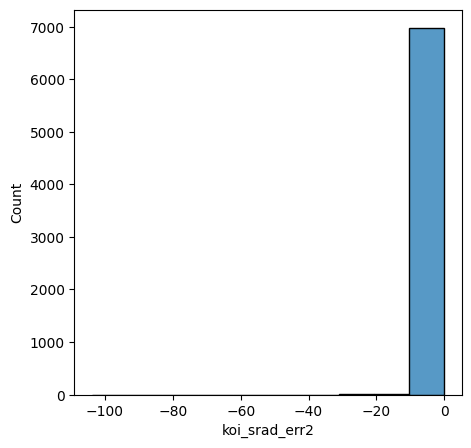

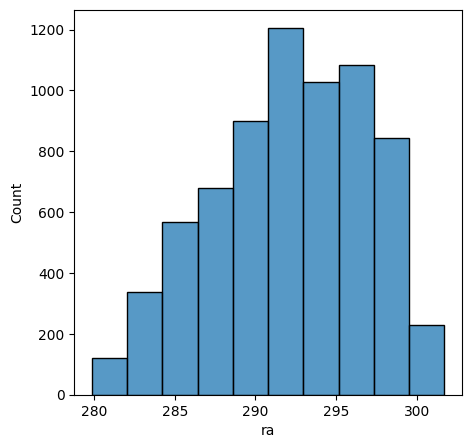

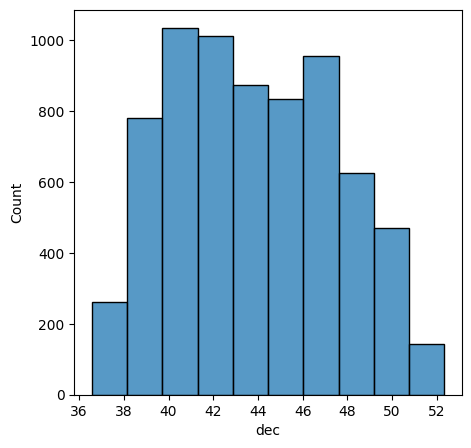

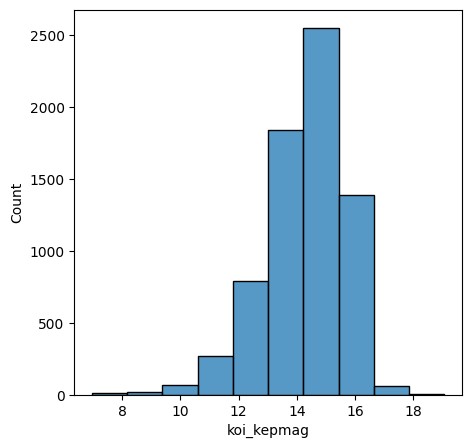

In [47]:

for f in features:
    plt.figure(figsize=(5,5))
    sns.histplot(train_set[f], bins=10)

In [114]:
train_set.describe().T

count          mean            std           min  \
koi_period         6995.0     57.077574     119.404791  2.598197e-01   
koi_period_err1    6995.0      0.001886       0.007455  2.100000e-08   
koi_period_err2    6995.0     -0.001886       0.007455 -1.570000e-01   
koi_time0bk        6995.0    164.616472      64.718195  1.205159e+02   
koi_time0bk_err1   6995.0      0.009380       0.022077  8.700000e-06   
koi_time0bk_err2   6995.0     -0.009380       0.022077 -5.690000e-01   
koi_impact         6995.0      0.714256       3.161389  0.000000e+00   
koi_impact_err1    6995.0      1.966452       9.468328  0.000000e+00   
koi_duration       6995.0      5.575517       6.564355  2.220000e-01   
koi_duration_err1  6995.0      0.323505       0.665026  0.000000e+00   
koi_duration_err2  6995.0     -0.323505       0.665026 -2.020000e+01   
koi_depth          6995.0  22784.162030   79453.848538  4.500000e+00   
koi_teq            6995.0   1080.404432     837.826586  9.200000e+01   
koi_insol          6995.0   7712.017857  175311.036825  2.000000e-02   
koi_insol_err1     6995.0   3329.845856   53217.761086  0.000000e+00   
koi_insol_err2     6995.0  -4066.327245   98780.142935 -5.600031e+06   
koi_model_snr      6995.0    267.218142     810.369274  1.600000e+00   
koi_tce_plnt_num   6995.0      1.234739       0.643766  1.000000e+00   
koi_steff          6995.0   5695.855182     790.726490  2.661000e+03   
koi_steff_err1     6995.0    143.898070      46.970830  0.000000e+00   
koi_steff_err2     6995.0   -160.751823      69.804795 -1.762000e+03   
koi_slogg          6995.0      4.315191       0.423096  1.140000e-01   
koi_slogg_err1     6995.0      0.120119       0.132779  0.000000e+00   
koi_slogg_err2     6995.0     -0.140452       0.083388 -1.207000e+00   
koi_srad           6995.0      1.669207       5.582381  1.160000e-01   
koi_srad_err1      6995.0      0.347430       0.884815  0.000000e+00   
koi_srad_err2      6995.0     -0.370675       1.880909 -1.038250e+02   
ra                 6995.0    292.101142       4.760632  2.798527e+02   
dec                6995.0     43.826290       3.627619  3.657738e+01   
koi_kepmag         6995.0     14.282586       1.342935  6.966000e+00   

                           25%          50%          75%           max  
koi_period            2.721451     9.041891    34.588313  1.071233e+03  
koi_period_err1       0.000005     0.000034     0.000255  1.570000e-01  
koi_period_err2      -0.000255    -0.000034    -0.000005 -2.100000e-08  
koi_time0bk         132.749715   136.982145   170.087921  9.070447e+02  
koi_time0bk_err1      0.001210     0.004000     0.010000  5.690000e-01  
koi_time0bk_err2     -0.010000    -0.004000    -0.001210 -8.700000e-06  
koi_impact            0.197150     0.542000     0.888500  1.008060e+02  
koi_impact_err1       0.040000     0.192000     0.377900  8.554000e+01  
koi_duration          2.443565     3.776900     6.158500  1.385400e+02  
koi_duration_err1     0.050300     0.138000     0.333000  2.020000e+01  
koi_duration_err2    -0.333000    -0.138000    -0.050300  0.000000e+00  
koi_depth           163.000000   422.000000  1465.000000  1.540000e+06  
koi_teq             548.000000   882.000000  1374.000000  1.466700e+04  
koi_insol            21.270000   143.540000   842.260000  1.094755e+07  
koi_insol_err1       10.850000    77.080000   516.460000  3.617133e+06  
koi_insol_err2     -287.905000   -42.870000    -6.105000  0.000000e+00  
koi_model_snr        12.400000    23.400000    78.650000  9.054700e+03  
koi_tce_plnt_num      1.000000     1.000000     1.000000  8.000000e+00  
koi_steff          5301.000000  5755.000000  6108.000000  1.589600e+04  
koi_steff_err1      105.000000   157.000000   174.000000  6.760000e+02  
koi_steff_err2     -197.000000  -159.000000  -112.000000  0.000000e+00  
koi_slogg             4.220000     4.440000     4.546000  5.283000e+00  
koi_slogg_err1        0.042000     0.070000     0.149000  1.472000e+00  
koi_slogg_err2       -0.195000    -

In [48]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [49]:
no_log = ['koi_steff', 'koi_steff_err1', 'ra', 'dec', 'koi_kepmag']

In [50]:
for valor in features:
    if valor not in no_log:
        train_set_scaled[valor]=np.log(train_set_scaled[valor] + 6000000 )
        test_set_scaled[valor]=np.log(test_set_scaled[valor] + 6000000 )

In [51]:
train_set_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6995 entries, 947 to 166
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6995 non-null   object 
 1   koi_period         6995 non-null   float64
 2   koi_period_err1    6995 non-null   float64
 3   koi_period_err2    6995 non-null   float64
 4   koi_time0bk        6995 non-null   float64
 5   koi_time0bk_err1   6995 non-null   float64
 6   koi_time0bk_err2   6995 non-null   float64
 7   koi_impact         6995 non-null   float64
 8   koi_impact_err1    6995 non-null   float64
 9   koi_duration       6995 non-null   float64
 10  koi_duration_err1  6995 non-null   float64
 11  koi_duration_err2  6995 non-null   float64
 12  koi_depth          6995 non-null   float64
 13  koi_teq            6995 non-null   float64
 14  koi_insol          6995 non-null   float64
 15  koi_insol_err1     6995 non-null   float64
 16  koi_insol_err2     6995 non-

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4124\2005382840.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


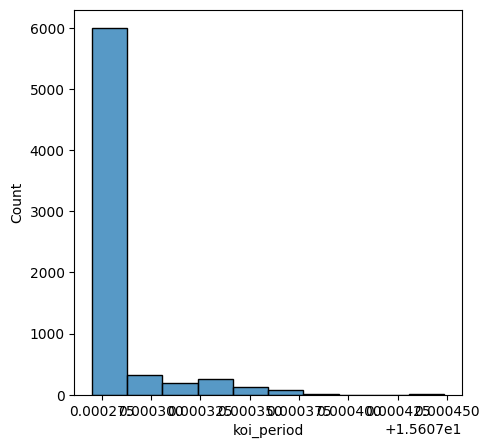

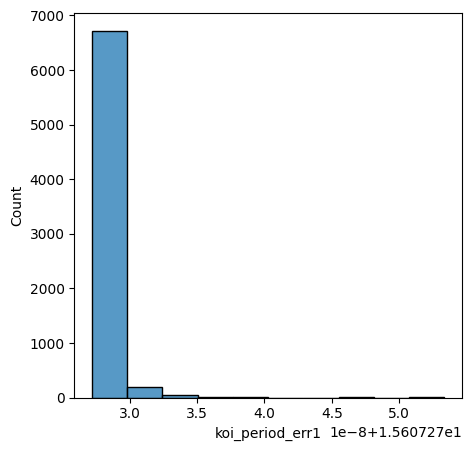

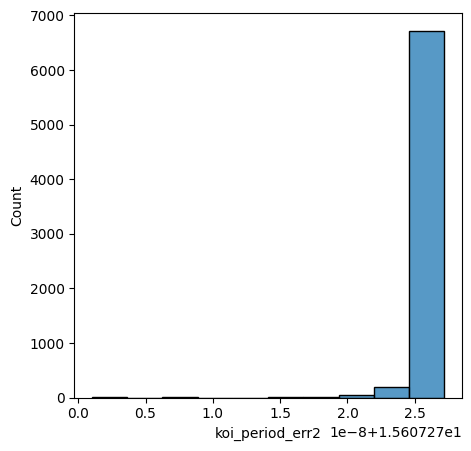

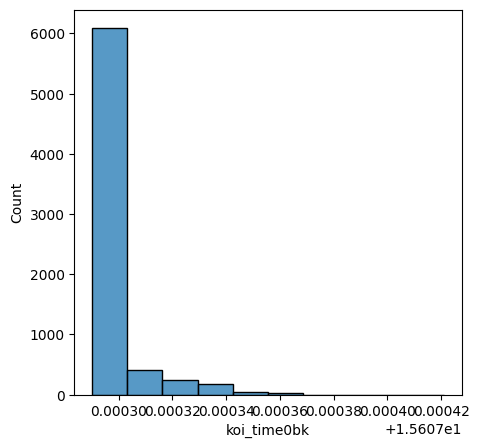

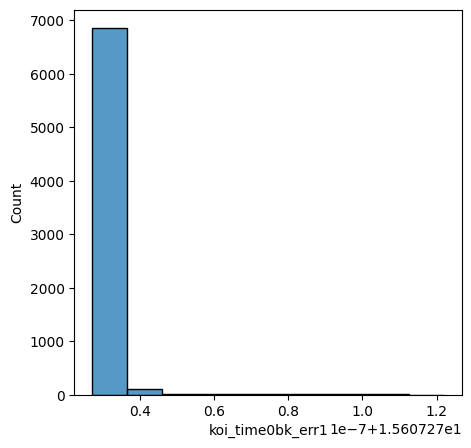

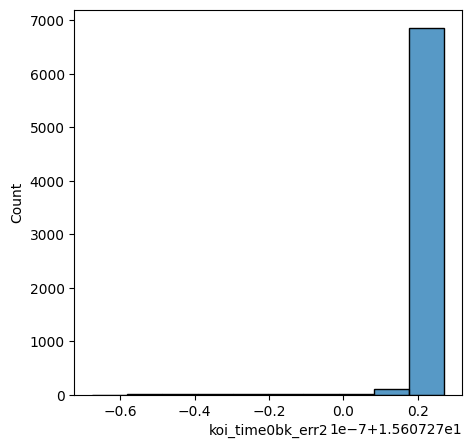

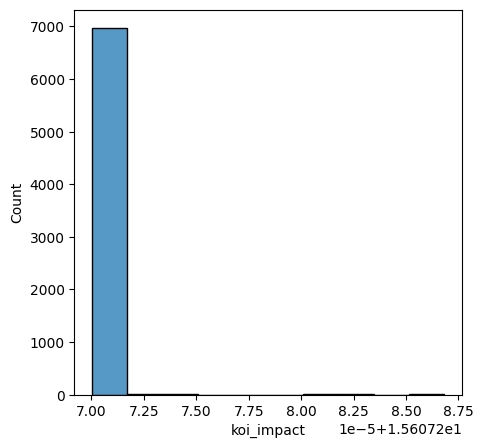

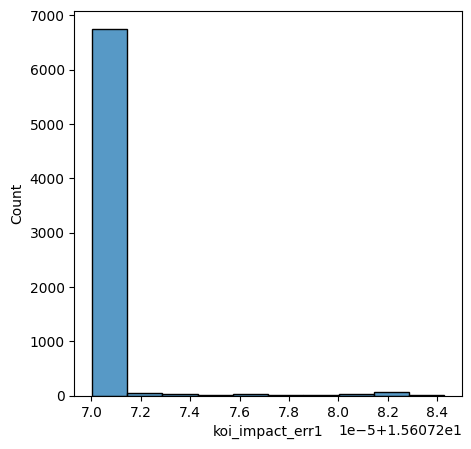

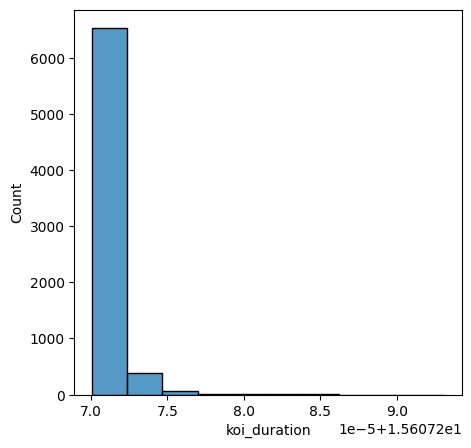

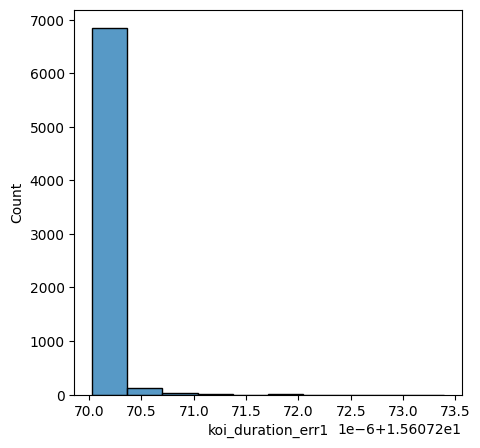

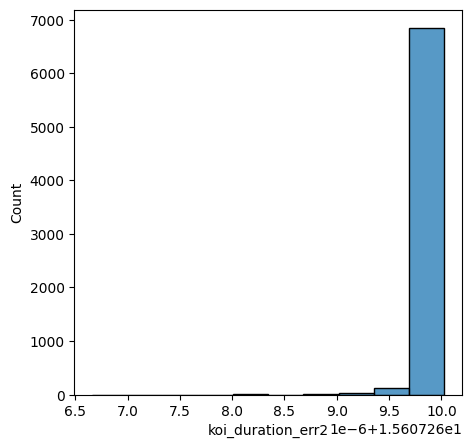

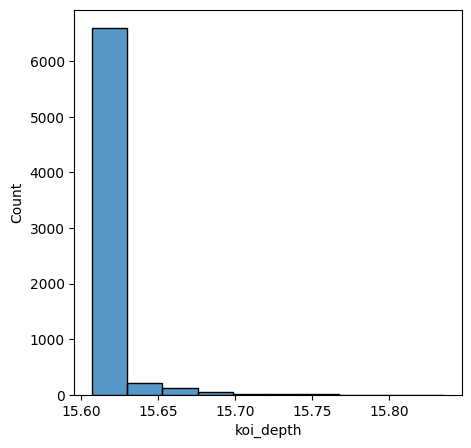

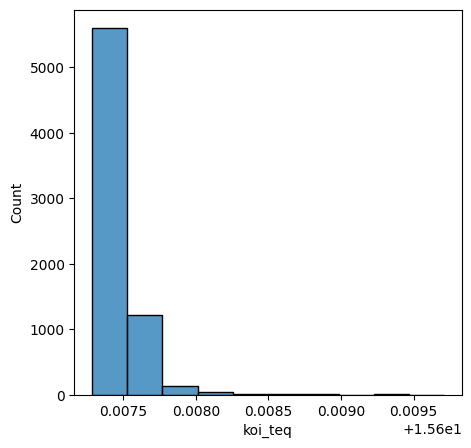

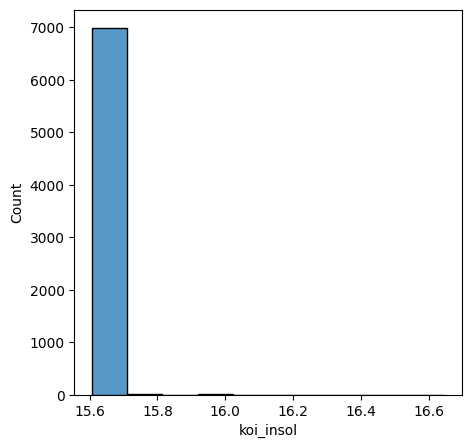

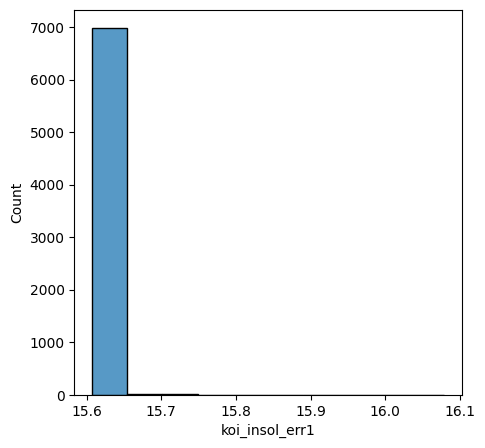

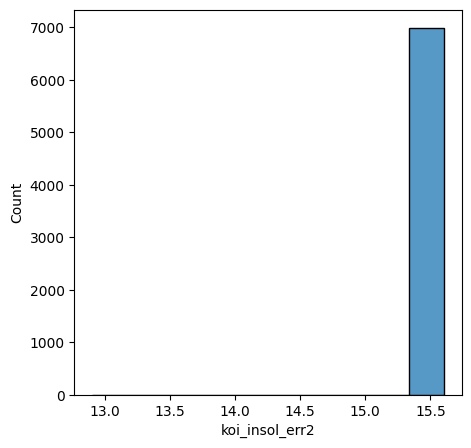

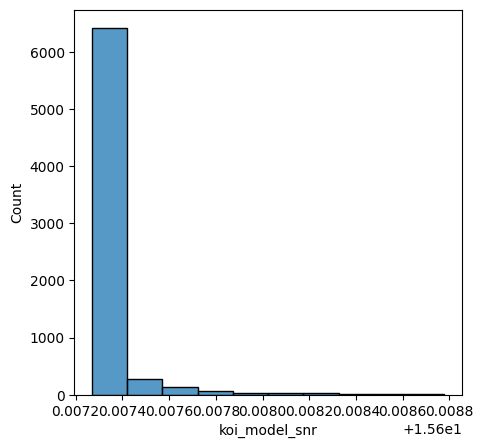

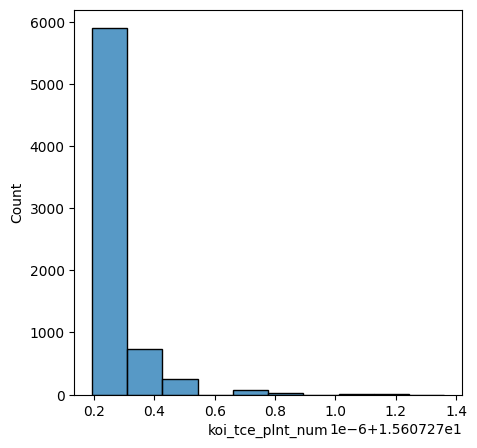

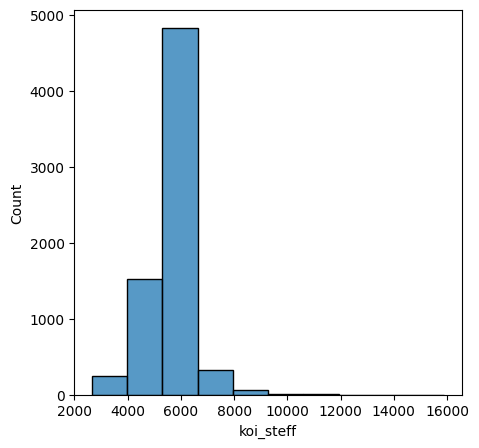

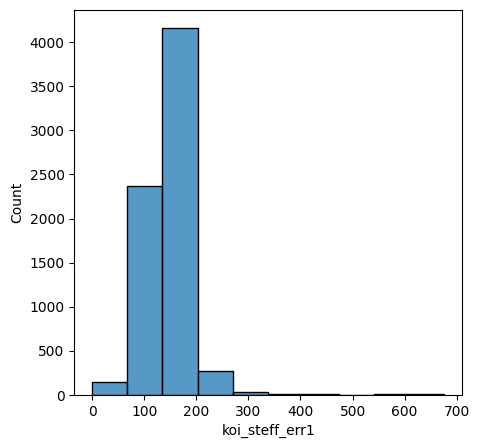

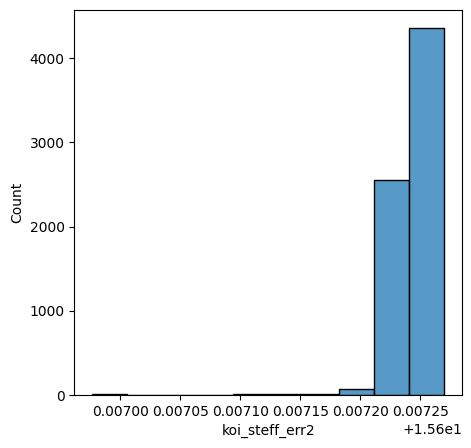

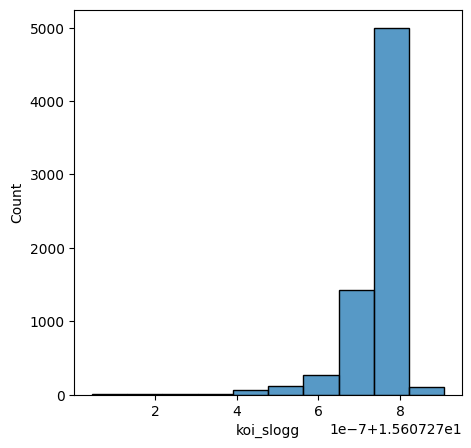

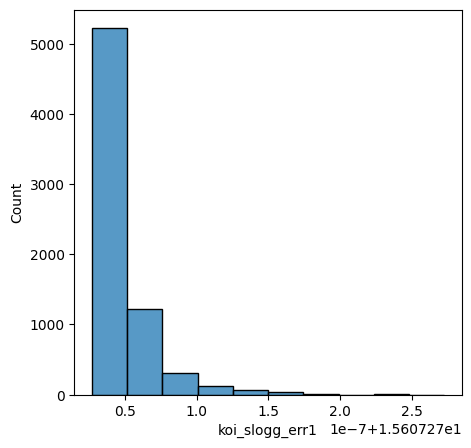

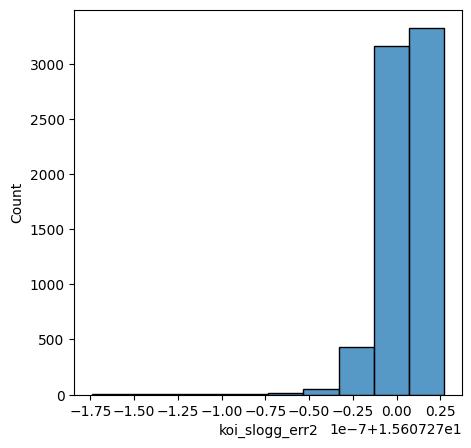

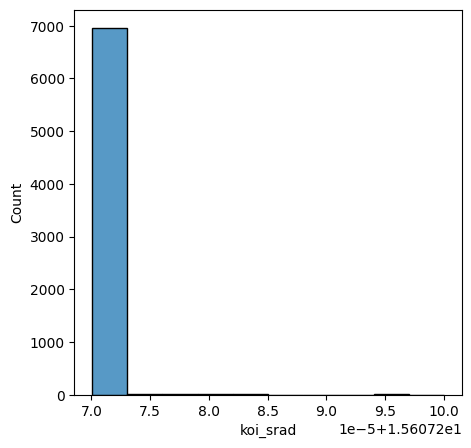

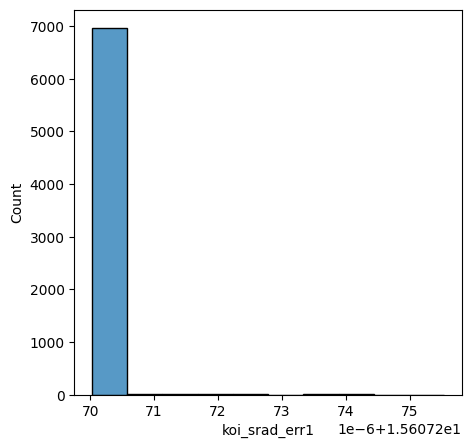

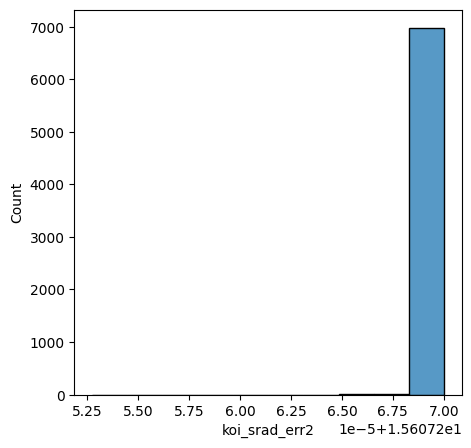

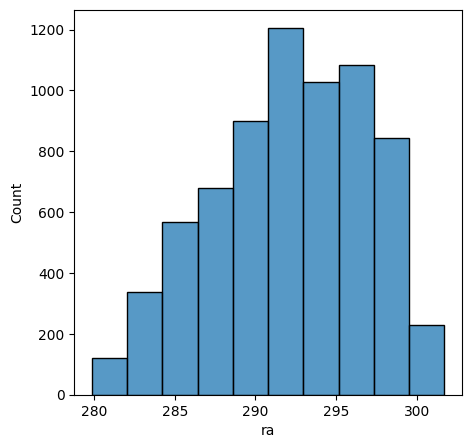

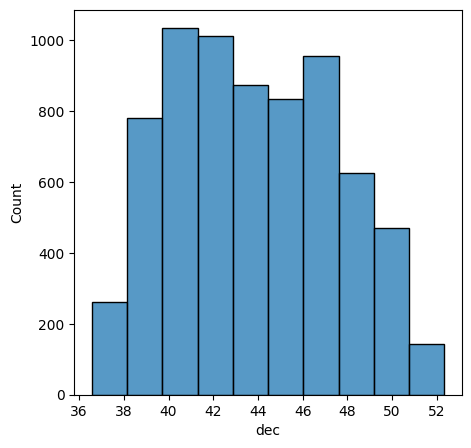

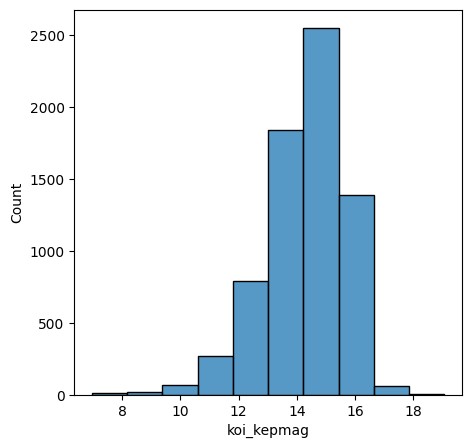

In [121]:
for f in features:
    plt.figure(figsize=(5,5))
    sns.histplot(train_set_scaled[f], bins=10)

In [122]:
scaler = StandardScaler()
train_set_scaled[features] = scaler.fit_transform(train_set_scaled[features])
test_set_scaled[features] = scaler.transform(test_set_scaled[features])

In [123]:
train_set_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6995 entries, 947 to 166
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6995 non-null   object 
 1   koi_period         6995 non-null   float64
 2   koi_period_err1    6995 non-null   float64
 3   koi_period_err2    6995 non-null   float64
 4   koi_time0bk        6995 non-null   float64
 5   koi_time0bk_err1   6995 non-null   float64
 6   koi_time0bk_err2   6995 non-null   float64
 7   koi_impact         6995 non-null   float64
 8   koi_impact_err1    6995 non-null   float64
 9   koi_duration       6995 non-null   float64
 10  koi_duration_err1  6995 non-null   float64
 11  koi_duration_err2  6995 non-null   float64
 12  koi_depth          6995 non-null   float64
 13  koi_teq            6995 non-null   float64
 14  koi_insol          6995 non-null   float64
 15  koi_insol_err1     6995 non-null   float64
 16  koi_insol_err2     6995 non-

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4124\2005382840.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


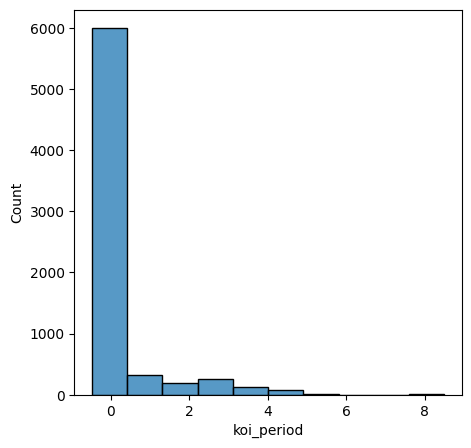

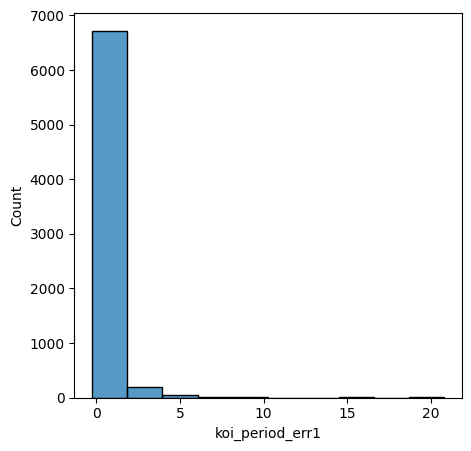

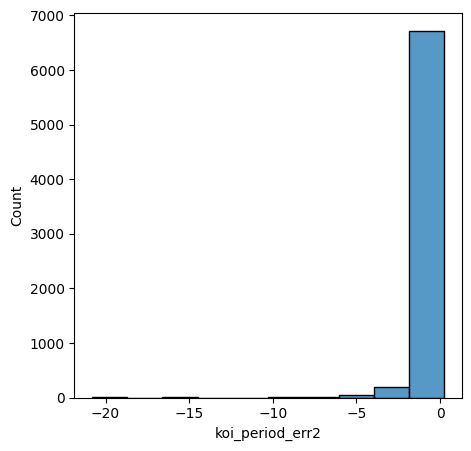

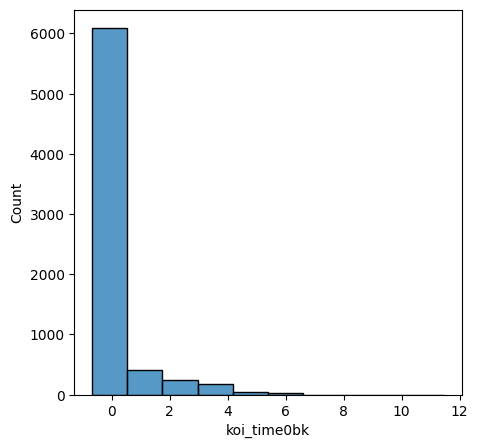

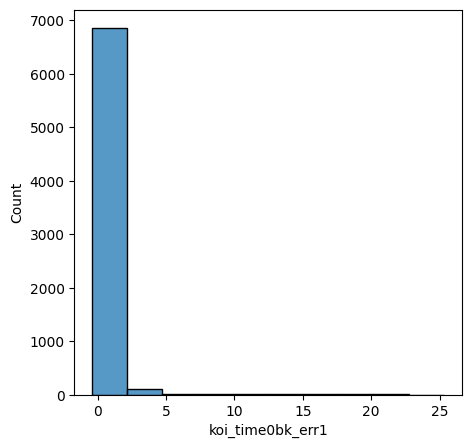

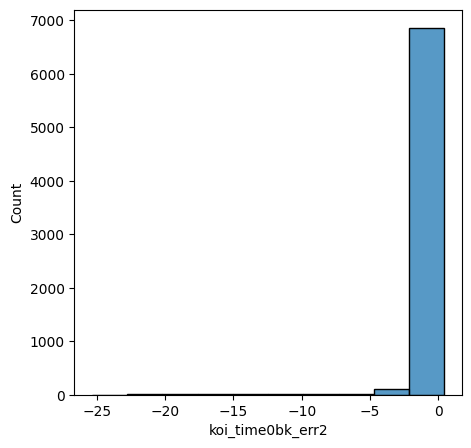

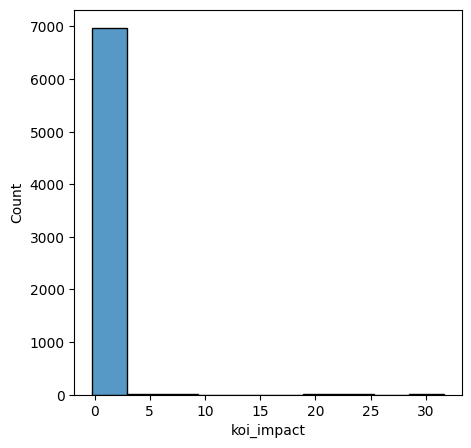

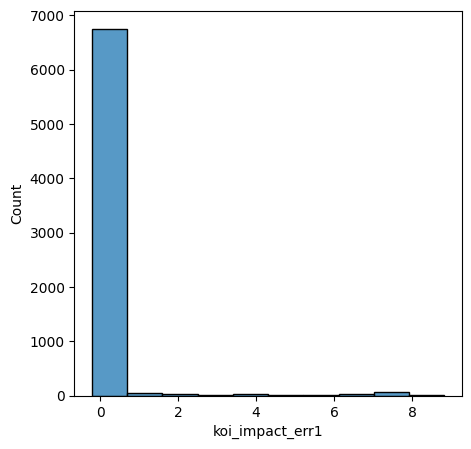

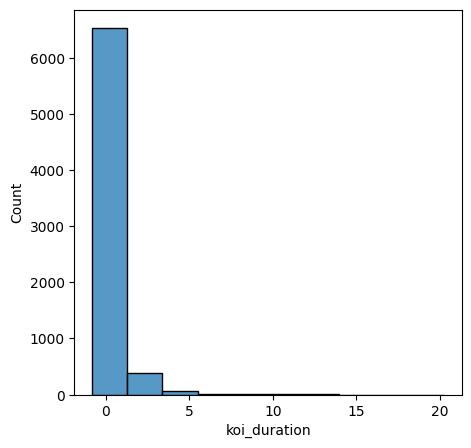

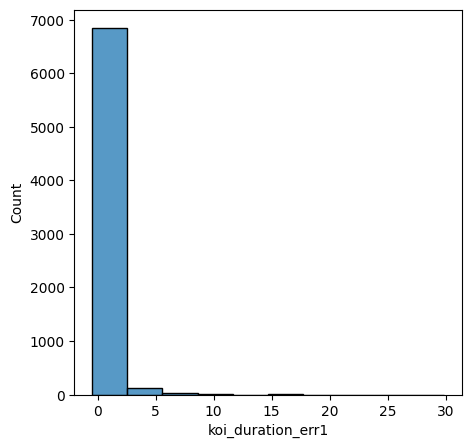

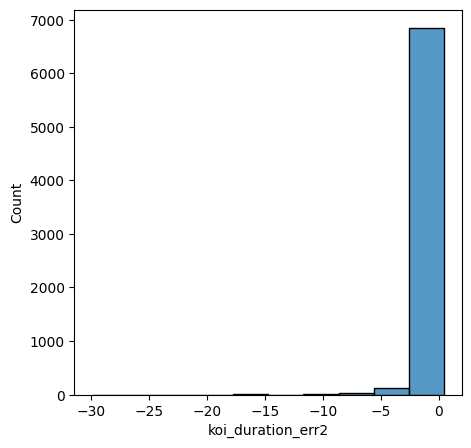

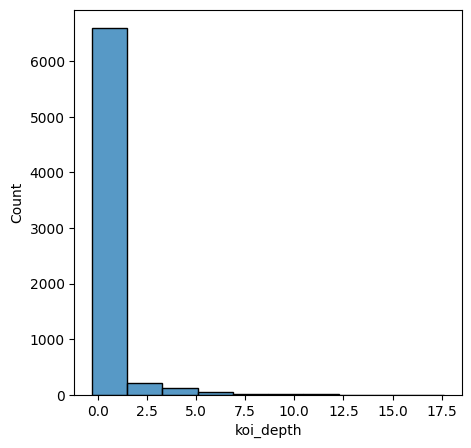

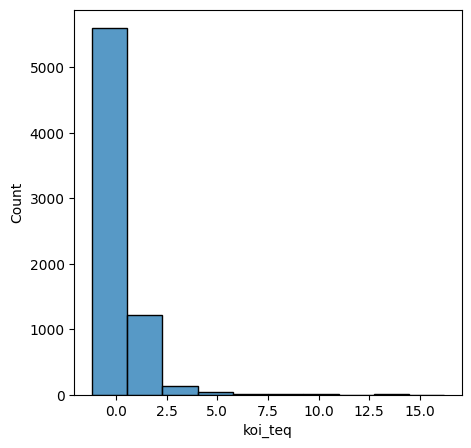

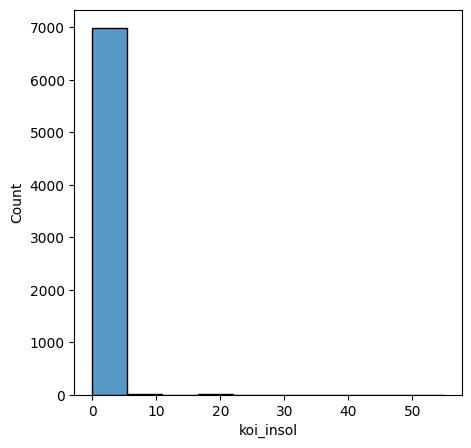

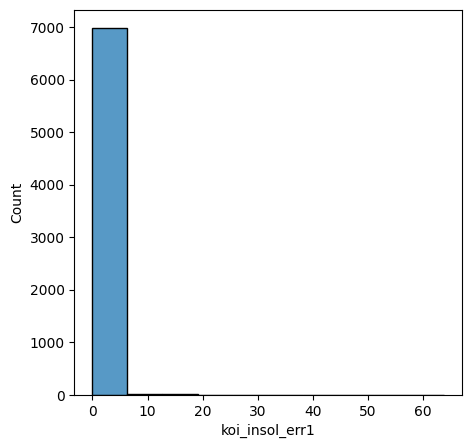

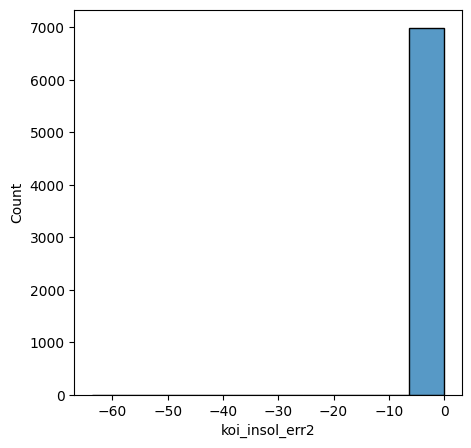

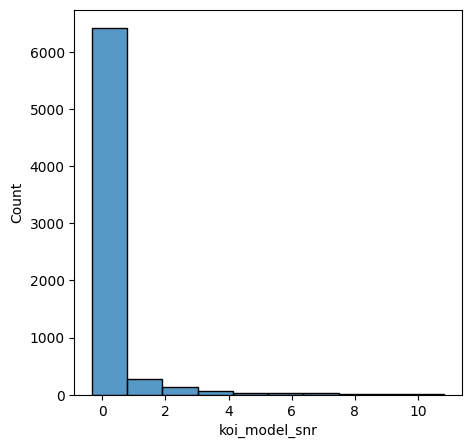

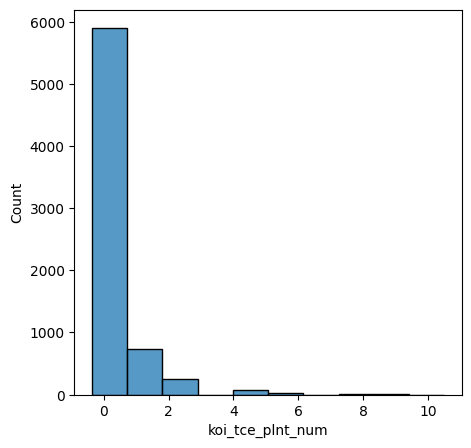

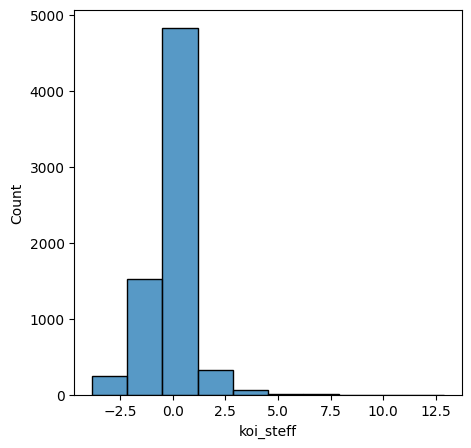

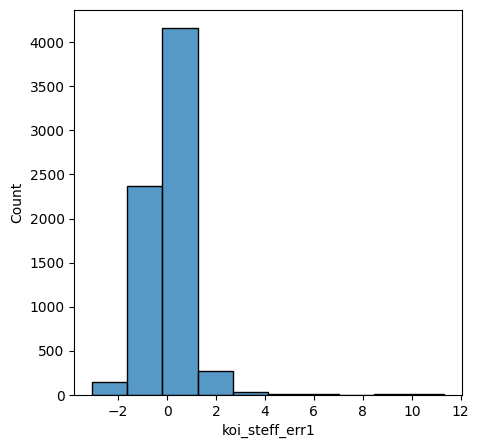

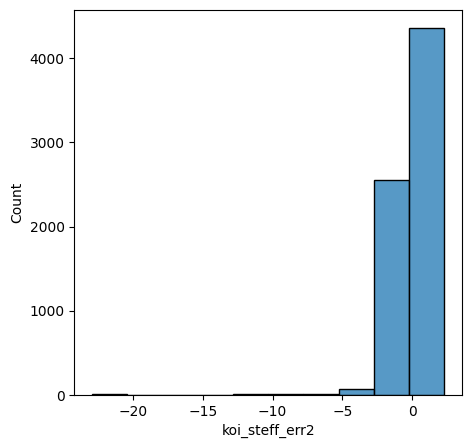

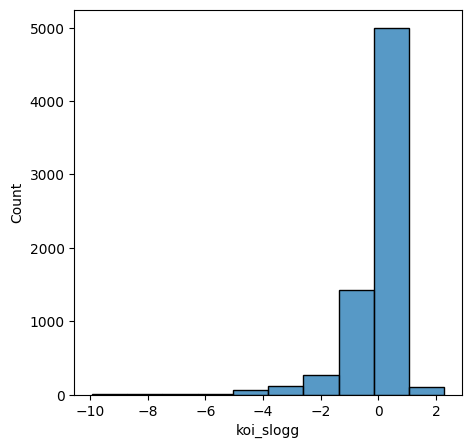

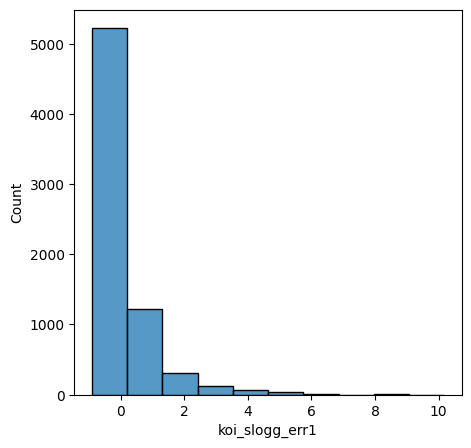

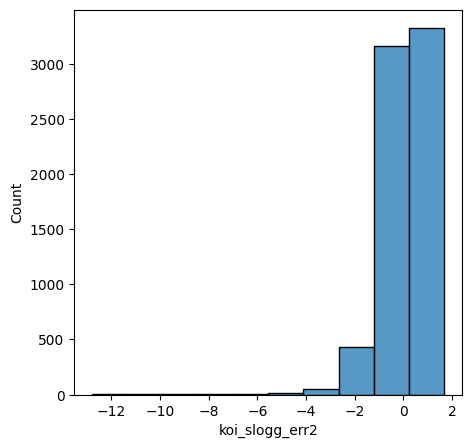

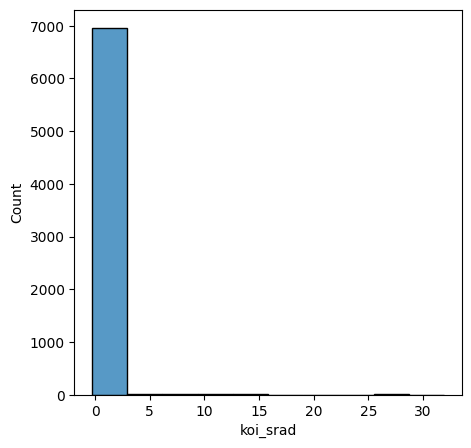

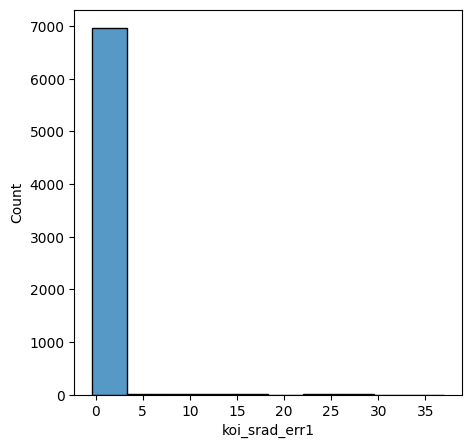

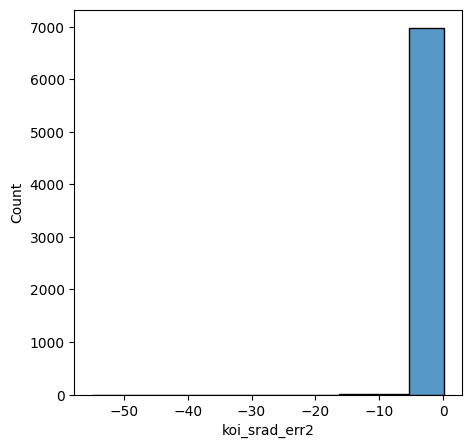

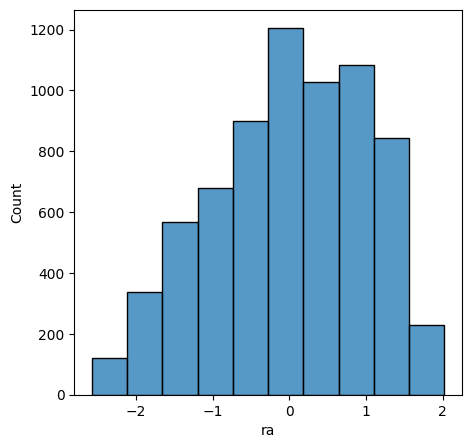

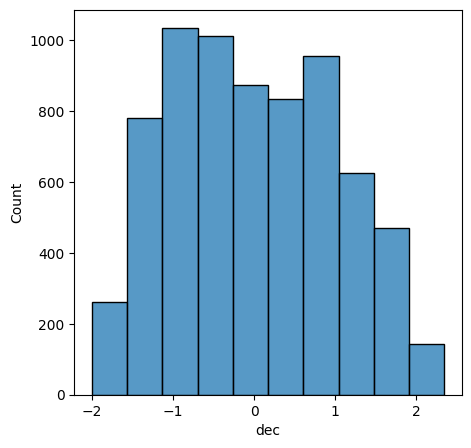

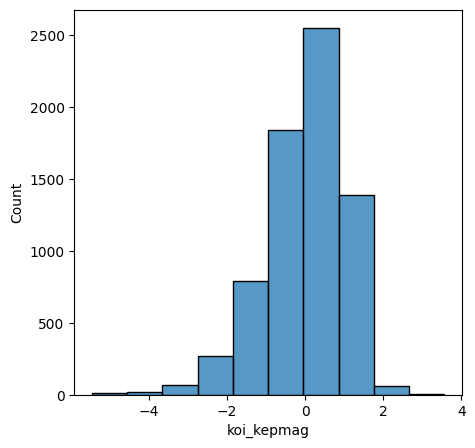

In [124]:
for f in features:
    plt.figure(figsize=(5,5))
    sns.histplot(train_set_scaled[f], bins=10)

Separamos en X e y

In [54]:
X_train = train_set[features]
X_train_scaled = train_set_scaled[features]
y_train = train_set[target]

X_test = test_set[features]
X_test_scaled = test_set_scaled[features]
y_test = test_set[target]

Convertimos la target en numerica

In [55]:
target_mapping = {
    'FALSE POSITIVE': 0,
    'CANDIDATE': 1,
    'CONFIRMED': 2
}

In [56]:
y_train = y_train.map(target_mapping)
y_test = y_test.map(target_mapping)

**7. Modelado**

Probamos con el modelo KNN como referencia básica.

In [57]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

In [58]:
y_pred_knn = knn_clf.predict(X_train_scaled)
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77      3371
           1       0.56      0.32      0.41      1755
           2       0.68      0.63      0.66      1869

    accuracy                           0.67      6995
   macro avg       0.65      0.61      0.61      6995
weighted avg       0.66      0.67      0.65      6995



Ahora compararemos los diferentes modelos clasificadores de ML

In [70]:
model_names = ["KNN", "Reg. Logistica", "Random Forest","XGBoost","LightGBM","CatBoost"]

lr_clf = LogisticRegression(max_iter = 100000)
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state= 42, verbose = False)

model_set = [knn_clf, lr_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]

In [71]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(f"Para {nombre}:", end = " ")
    if nombre not in ["KNN", "Reg. Logistica"]:
        metrica = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "accuracy")
    else:
        metrica = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "accuracy")
    print(np.mean(metrica))
    metricas_cv[nombre] = metrica
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]
print(f"And the winner is: {ganador} con una metrica de {np.mean(metricas_cv[ganador])}")

Para KNN: 0.5749814381889854
Para Reg. Logistica: 

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

0.5751247449360658
Para Random Forest: 0.765688562858374
Para XGBoost: 0.7738380379889813
Para LightGBM: 0.7744097319569018
Para CatBoost: 0.7809849790981866
And the winner is: CatBoost con una metrica de 0.7809849790981866


Aunque el ganador es CatBoost entiendo que el coste de proceso no justifica la escasa diferencia con el segundo que es LightGBM. Elijo el modelo LightGBM que tiene casi la misma métrica que el primero pero con una carga de proceso muy inferior.

**8. Optimización de hiperparámetros del modelo elegido. LightGBM**

In [66]:
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)

param_grid= {'max_depth': [3, 6, 12],
          'learning_rate': [0.1, 0.5, 1],
          'n_estimators': [100, 250, 500],
          "min_data_in_leaf": [1,10,100],
          "class_weight":["balanced",None]
          }

lgb_grid = GridSearchCV(lgb_clf, 
                        cv = 5,                               
                        param_grid= param_grid, 
                        scoring = "accuracy")


lgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-100),
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [3, 6, 12],
                         'min_data_in_leaf': [1, 10, 100],
                         'n_estimators': [100, 250, 500]},
             scoring='accuracy')

In [67]:
print("LGB best_score:", lgb_grid.best_score_)
lgb_grid.best_params_

LGB best_score: 0.7877055039313797


{'class_weight': None,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_data_in_leaf': 10,
 'n_estimators': 500}

**9. Predecimos y Evaluamos el modelo con el test set**

In [68]:
y_pred_lgb_grid_s = lgb_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_lgb_grid_s))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       843
           1       0.64      0.56      0.60       439
           2       0.79      0.85      0.82       467

    accuracy                           0.79      1749
   macro avg       0.76      0.76      0.76      1749
weighted avg       0.78      0.79      0.78      1749



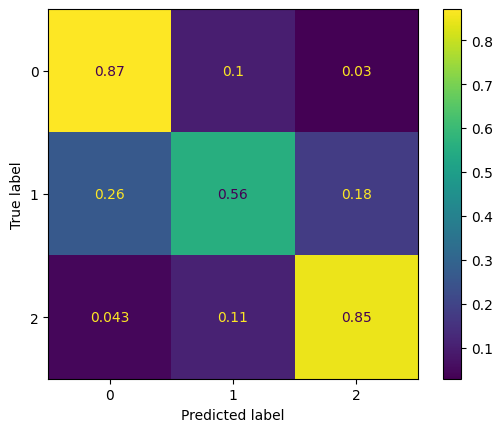

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, lgb_grid.best_estimator_.predict(X_test), normalize = "true")

Obtenemos un accuracy creo que satisfactorio para nuestro objetivo que es acertar lo mas posible en la clase CONFIRMADO (2).

El modelo acierta en el 85% de los casos.

En un 18% califica confirmado los que son realmente candidato, pero esto teniendo en cuenta que un porcentaje de los candidatos pudieran ser realmente exoplanetas nos aporta cierto valor.

Solamente falla totalmente en un 3% que califica como confirmado los que son falsos positivos.

Para evaluar la eficiencia definitiva del modelo habria calcular los costes/beneficios con los datos de negocio.

**10. Guardamos el modelo**

In [74]:
import joblib

joblib.dump(lgb_grid, 'C:/Users/Usuario/Desktop/ML Project/modelo_LGBM_EXO.pkl')

['C:/Users/Usuario/Desktop/ML Project/modelo_LGBM_EXO.pkl']